# Credit Risk Analysis

O **risco de crédito** é um dos maiores desafios enfrentados pelas instituições financeiras, pois o descumprimento das condições de pagamento pode levar a **perdas financeiras significativas**. A capacidade de avaliar se um usuário é capaz de cumprir suas obrigações financeiras é fundamental para o sucesso das instituições financeiras e, como resultado, soluções cada vez mais avançadas vêm sendo desenvolvidas para minimizar o risco de inadimplência.

Um termo comum usado para descrever a inadimplência é *default*, que se refere à incapacidade do mutuário de cumprir suas obrigações financeiras. Normalmente, o não pagamento é devido à incapacidade financeira do cliente, que pode ser causada por uma variedade de fatores, incluindo perda de emprego, doença ou eventos imprevistos.


<p align=center>
  <img src="Arquivos/risk.jpg" width="70%">
</p>
 
Grandes bancos e *Fintechs* estão investindo cada vez mais em modelos de Machine Learning para prevenir a inadimplência de alguns clientes. Esses modelos usam dados de histórico de pagamento, pontuação de crédito, renda e outras informações para avaliar o risco de inadimplência de um cliente e tomar decisões informadas sobre empréstimos e investimentos.

Nesse contexto, o **objetivo** deste projeto é utilizar os dados da instituição financeira *Nubank* para realizar uma análise de dados e desenvolver um modelo eficaz que possa prever com precisão se um cliente será ou não inadimplente. Esse modelo pode ajudar a instituição financeira a **tomar decisões mais informadas** e reduzir o **risco de perdas financeiras decorrentes da inadimplência**.

## Aquisição dos Dados

O conjunto de dados a ser utilizado neste Projeto de Data Science parte de uma competição realizada pela **Startup Nubank** a fim de revelar talentos e potenciais contratações pela *Fintech*. Os dados que serão utilizados nesta análise estão disponíveis para download por meio [deste link](http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0). 

Apesar de não haver informações explícitas disponíves, os nomes das colunas permitem um entendimento a respeito do problema.

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import folium
import re

from sklearn.metrics import precision_recall_curve, classification_report, f1_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
import scikitplot as skplt

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_rows', 5)

In [409]:
# importar os dados
DATA_PATH = "http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0"
df = pd.read_csv(DATA_PATH)

## Análise dos Dados

Esta etapa tem por objetivo permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `ids`: ID único do candidato.
* `target_default`: variável alvo indicando se o candidato é um bom pagador (0) ou se ele entrou em inadimplência (1).
* `score_1 a score_6`: valores de pontuação de diferentes fontes.
* `risk_rate`: taxa de risco do candidato.
* `last_amount_borrowed`: valor do último empréstimo solicitado.
* `last_borrowed_in_months`: número de meses desde que o último empréstimo foi solicitado.
* `credit_limit`: limite de crédito do candidato.
* `reason`: razão para solicitação do empréstimo.
* `income`: renda declarada pelo candidato.
* `facebook_profile`: indica se o candidato tem um perfil no Facebook associado à sua conta.
* `state`: estado em que o candidato reside.
* `zip`: código postal do candidato.
* `channel`: canal pelo qual o candidato se inscreveu.
* `job_name`: nome da profissão do candidato.
* `real_state`: status do imóvel do candidato.
* `ok_since`: número de meses desde que o candidato forneceu uma resposta satisfatória.
* `n_bankruptcies`: número de falências anteriores do candidato.
* `n_defaulted_loans`: número de empréstimos inadimplentes do candidato.
* `n_accounts`: número de contas abertas pelo candidato.
* `n_issues`: número de problemas relatados pelo candidato.
* `application_time_applied`: hora em que o candidato fez a inscrição.
* `application_time_in_funnel`: tempo que o candidato passou no funil de inscrição.
* `email`: endereço de e-mail do candidato.
* `external_data_provider_credit_checks_last_2_year`: número de verificações de crédito nos últimos dois anos.
* `external_data_provider_credit_checks_last_month`: número de verificações de crédito no último mês.
* `external_data_provider_credit_checks_last_year`: número de verificações de crédito no último ano.
* `external_data_provider_email_seen_before`: indica se o endereço de e-mail do candidato já foi visto antes.
* `external_data_provider_first_name`: primeiro nome do candidato em uma fonte externa.
* `external_data_provider_fraud_score`: pontuação de fraude do candidato em uma fonte externa.
* `lat_lon`: coordenadas geográficas do candidato.
* `marketing_channel`: canal de marketing pelo qual o candidato foi adquirido.
* `profile_phone_number`: número de telefone do candidato.
* `reported_income`: renda relatada pelo candidato.
* `shipping_state`: estado para o qual o produto será enviado.
* `shipping_zip_code`: código postal para o qual o produto será enviado.
* `profile_tags`: tags associadas ao perfil do candidato.
* `user_agent`: informações sobre o navegador e o dispositivo do candidato.
* `target_fraud`: variável alvo indicando se o candidato é fraudulento (1) ou não (0).

## Análise Exploratória dos Dados

Na análise exploratória de dados será efetuada uma explanação inicial das variáveis contidas na dataset, e entenderemos dados referentes a:

* *Contexto geral das variáveis*
* *Porcentagem de itens nulos*
* *Análise de features em diferentes grupos*
* *Balanceamento do dataset*
* *Feature Engineering*


Primeiramente, observaremos como estão dispostas as cinco primeiras entradas do dataset para ter uma visão ampla da estrutura de dados.

In [274]:
df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.00,101.80,0.26,108.43,0.40,25033.92,36.00,0.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.00,0.00,18.00,18.00,07:52:34,444,outlook.com,NaN,2,0.00,51.00,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.00,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.00,97.06,0.94,92.00,0.24,NaN,NaN,39726.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.00,0.00,0.00,14.00,14.00,02:34:29,346,gmail.com,0.00,1,0.00,17.00,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.00,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.00,100.03,0.35,112.89,0.29,7207.92,36.00,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.00,0.00,10.00,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.00,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.00,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.00,101.60,0.99,94.90,0.32,NaN,NaN,54591.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.00,0.00,19.00,19.00,11:20:49,406,spgov.com,NaN,3,NaN,38.00,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.00,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.00,98.47,0.53,118.13,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.00,0.00,11.00,NaN,13:39:03,240,gmail.com,0.00,2,1.00,46.00,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.00,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


Logo de início, pode-se fazer algumas observações:
* A variável `ids` serve como identificador único.
* A variável `target_default` é a variável alvo, que indica a probabilidade do cliente ser inadimplente.
* A variável `target_fraud` possivelmente foi variável alvo em outro modelo e indica a probabilidade de o cliente ser fraudulento.
* `Score_1 a 2` são strings, mas `score_3 a 6` são numéricos.
* A coluna `profile_tags` contém tags de descrição.


Verificarei agora o tamanho do dataset.

In [275]:
# verifica o tamanho do dataset
print("Entradas:", df.shape[0])
print("Variáveis:", df.shape[1])

Entradas: 45000
Variáveis: 43


In [276]:
# Extrair o nome das colunas
df.columns

Index(['ids', 'target_default', 'score_1', 'score_2', 'score_3', 'score_4',
       'score_5', 'score_6', 'risk_rate', 'last_amount_borrowed',
       'last_borrowed_in_months', 'credit_limit', 'reason', 'income',
       'facebook_profile', 'state', 'zip', 'channel', 'job_name', 'real_state',
       'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts',
       'n_issues', 'application_time_applied', 'application_time_in_funnel',
       'email', 'external_data_provider_credit_checks_last_2_year',
       'external_data_provider_credit_checks_last_month',
       'external_data_provider_credit_checks_last_year',
       'external_data_provider_email_seen_before',
       'external_data_provider_first_name',
       'external_data_provider_fraud_score', 'lat_lon', 'marketing_channel',
       'profile_phone_number', 'reported_income', 'shipping_state',
       'shipping_zip_code', 'profile_tags', 'user_agent', 'target_fraud'],
      dtype='object')

In [277]:
# Extrair o tipo das variáveis
df.dtypes

ids               object
target_default    object
                   ...  
user_agent        object
target_fraud      object
Length: 43, dtype: object

A priori, as variáveis aparentam ter o tipo de dado coerente. Irei verificar agora a porcentagem de itens nulos.

In [278]:
# Porcentagem de item nulo
round(df.isnull().sum()/df.shape[0] * 100, 2).sort_values(ascending = False)

target_fraud               96.62
last_amount_borrowed       66.57
                            ... 
application_time_applied    0.00
ids                         0.00
Length: 43, dtype: float64

Foi possível notar que:
* A variável `target_fraud` possui 97% dos itens nulos.
* As variáveis `last_amount_borrowed ` e `last_borrowed_in_months` possuem 67% dos itens nulos.
* As variáveis `ok_since` e `external_data_provider_credit_checks_last_2_year` possuem mais que 50% dos itens nulos.

Os dados ausentes precisam ser tratados, posteriormente farei uma análise mais aprofundada para verificar a relevância das variáveis e a forma mais adequada de corrigi-los. Como há uma quantidade considerável de variáveis, optei por dividi-las em grupo a fim de realizar uma análise minuciosa.

### Grupo 1: Variáveis Demográficas e de Comportamento

Este grupo inclui variáveis que descrevem as características demográficas e comportamentais dos candidatos. Essas variáveis são coletadas no momento da solicitação do empréstimo e podem incluir informações como a razão para o empréstimo `razão`, a renda do candidato `income`, se o candidato possui um perfil no Facebook `facebook_profile`, estado e código postal `state, zip`, canal de aquisição do cliente `channel`, profissão do candidato `job_name`, tipo de imóvel em que o candidato reside `real_state`, número de falências anteriores `n_bankruptcies`, número de empréstimos inadimplentes anteriores `n_defaulted_loans`, número de contas bancárias abertas `n_accounts`, número de problemas relatados `n_issues`, tempo de aplicação `application_time_applied`, tempo desde o início do processo de empréstimo `application_time_in_funnel`, endereço de e-mail `email`, localização geográfica do candidato `lat_lon`, canal de marketing `marketing_channel`, número de telefone do candidato `profile_phone_number`, renda reportada do candidato `reported_income`, estado de envio `shipping_state`, código postal de envio `shipping_zip_code`, tags de perfil `profile_tags` e tipo de navegador usado pelo candidato `user_agent`.

In [279]:
df_group1 = df[['reason', 'income', 'facebook_profile', 'state', 'zip', 'channel', 'job_name', 
    'real_state', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'n_issues', 
    'application_time_applied', 'application_time_in_funnel', 'email', 'lat_lon', 
    'marketing_channel', 'profile_phone_number', 'reported_income', 'shipping_state', 
    'shipping_zip_code', 'profile_tags', 'user_agent', 'target_default']].copy()

Veremos agora quantos valores unicos há nas variáveis `reason`, `state` e `real_state`. Essas variáveis estão codificadas a fim de deixar o conteúdo anônimo.

In [280]:
print("Variáveis únicas em reason: {}".format(df_group1.reason.nunique()))
print("Variáveis únicas em state: {}".format(df_group1.state.nunique()))
print("Variáveis únicas em real_state: {}".format(df_group1.real_state.nunique()))

Variáveis únicas em reason: 14874
Variáveis únicas em state: 50
Variáveis únicas em real_state: 5


Podemos observar que houve 50 estado em que o candidato reside, como os dados foram coletados no Brasil, provavelmente houve algum erro de digitação. Também houveram 14874 motivos diferentes para solicitação de empréstimo e 5 valores em `real_state`.

Irei comparar a frequência de valores em `marketing_channel` plotando um gráfico de barras.

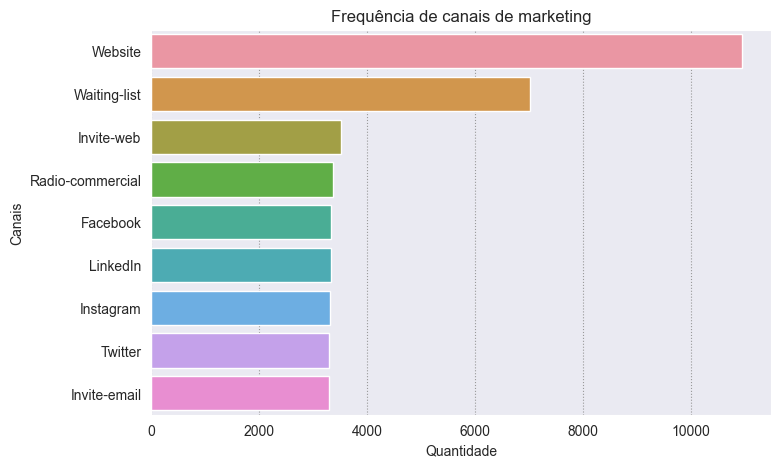

In [281]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_palette("PuBuGn_d")

x = df_group1.marketing_channel.value_counts().values
y = df_group1.marketing_channel.value_counts().index

ax.set_title('Frequência de canais de marketing')
ax.set_ylabel('Canais')
ax.set_xlabel('Quantidade')

sns.barplot(x = x, y = y, ax = ax, color = sns.set_palette("PuBuGn_d"));

A variável `marketing_channel` identifica o canal de marketing pelo qual o candidato foi adquirido, neste caso é majoritariamente Website, Lista de Espera e Convite da Web. Veremos a mesma visualização para emails em transações normais e inadimplentes.

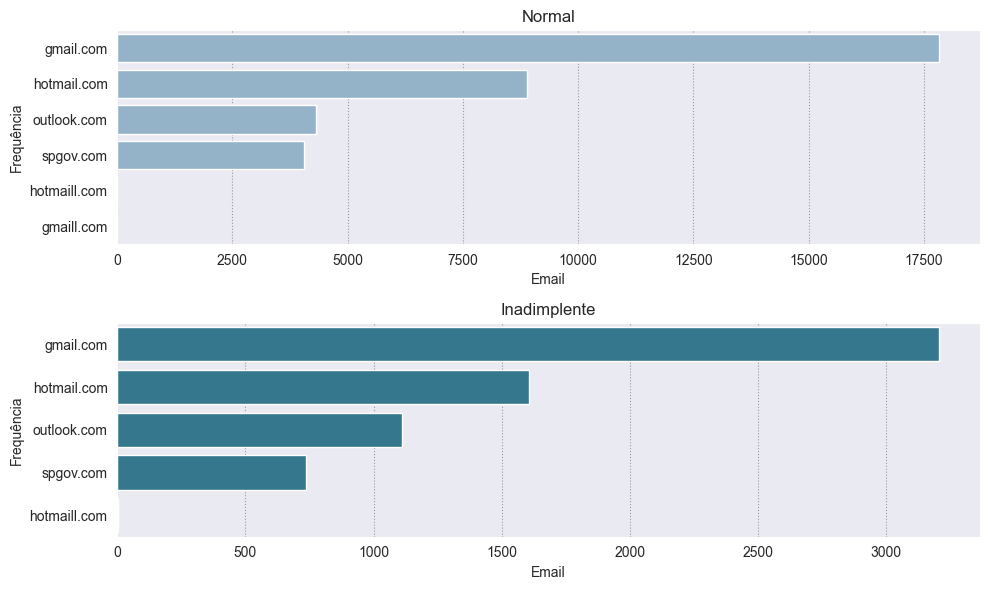

In [282]:

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,6))

x = df_group1.email.loc[df_group1.target_default == False].value_counts().values
y = df_group1.email.loc[df_group1.target_default == False].value_counts().index

xx = df_group1.email.loc[df_group1.target_default == True].value_counts().values
yy = df_group1.email.loc[df_group1.target_default == True].value_counts().index

sns.barplot(x = x, y = y, color=sns.color_palette()[0], ax = ax[0])
ax[0].set_title('Normal')

sns.barplot(x = xx, y = yy, color=sns.color_palette()[3], ax = ax[1])
ax[1].set_title('Inadimplente')

ax[0].set_xlabel('Email')
ax[0].set_ylabel('Frequência')

ax[1].set_xlabel('Email')
ax[1].set_ylabel('Frequência')

plt.tight_layout()


De modo geral, as distribuições são semelhantes para clientes pagantes e inadimplentes.

Por fim, modificarei a variável `shipping_state` para retirar "BR-" do label, mantendo somente o estado.

In [283]:
df_group1['shipping_state'].value_counts()

BR-SP    6994
BR-AM    4037
         ... 
BR-CE    1301
BR-ES    1289
Name: shipping_state, Length: 25, dtype: int64

In [284]:
df_group1['shipping_state'] = df['shipping_state'] = df_group1['shipping_state'].str.replace('BR-', '')

Verificaremos agora os 5 estados mais frequentes para clientes pagantes e inadimplentes.

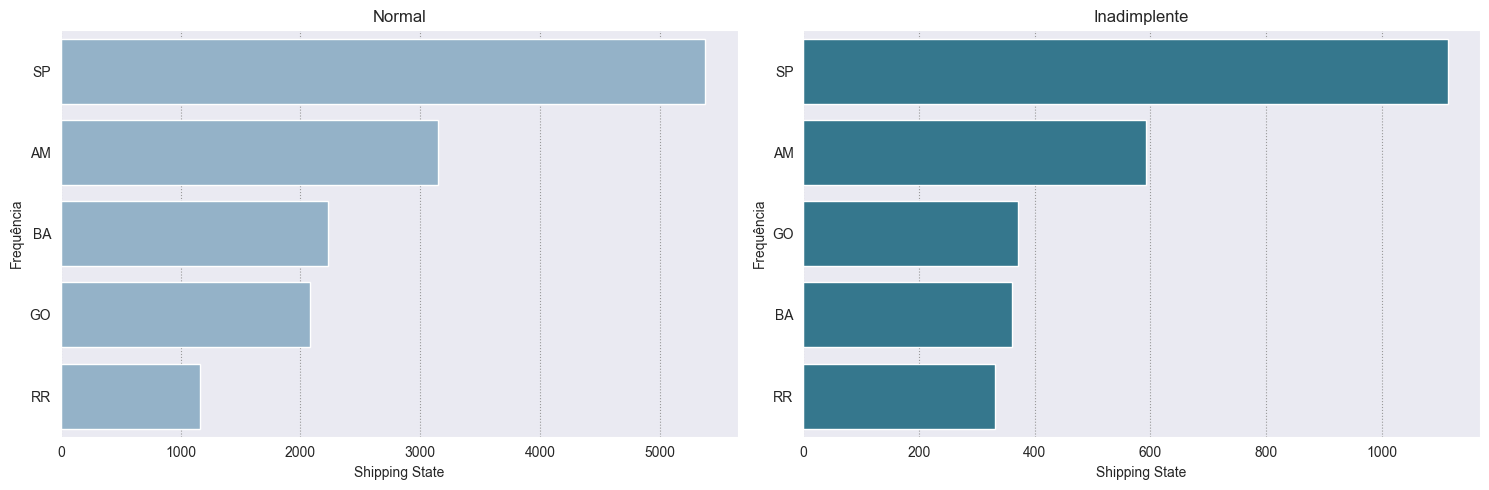

In [285]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

x = df_group1['shipping_state'].loc[df_group1.target_default == False].value_counts().values[:5]
y = df_group1['shipping_state'].loc[df_group1.target_default == False].value_counts().index[:5]

xx = df_group1['shipping_state'].loc[df_group1.target_default == True].value_counts().values[:5]
yy = df_group1['shipping_state'].loc[df_group1.target_default == True].value_counts().index[:5]

sns.barplot(x = x, y = y, color=sns.color_palette()[0], ax = ax[0])
ax[0].set_title('Normal')

sns.barplot(x = xx, y = yy, color=sns.color_palette()[3], ax = ax[1])
ax[1].set_title('Inadimplente')

ax[0].set_xlabel('Shipping State')
ax[0].set_ylabel('Frequência')

ax[1].set_xlabel('Shipping State')
ax[1].set_ylabel('Frequência')

plt.tight_layout()


* Para clientes pagantes: SP, AM, BA, GO e RR.
* Para inadimplentes: SP, AM, GO, BA e RR.

Agora verificarei as informações estatísticas das variáveis.

In [286]:
# Verificar informações estatísticas
df_group1.describe()

,income,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,reported_income,shipping_zip_code
count,44438.00,44303.00,44426.00,44438.00,33456.00,45000.00,45000.00,45000.00
mean,71607.39,0.08,0.00,10.70,11.07,247.54,inf,33923.51
...,...,...,...,...,...,...,...,...
75%,86019.23,0.00,0.00,13.00,14.00,375.00,151337.25,44910.00
max,5000027.83,5.00,5.00,49.00,49.00,500.00,inf,56000.00


Pode-se perceber que :
* Há uma grande presença de *outliers* na variável `income`,onde a mediana da renda é 61267, mas o valor máximo está em 5000028.
* O valor máximo da variável `reported_income` não é um valor válido, sendo infinito.
* A maior parte dos usuários não teve falências anteriores, por `n_bankruptcies`.
* A maior parte dos usuários não teve inadimplência por `n_defaulted_loans`.
* Os valores de renda reportado pela fonte externa em `reported_income` têm características diferentes que a renda reportada pelo usuário em `income`.

Primeiramente, iremos observar a variável `income` plotando um histograma para a mesma.

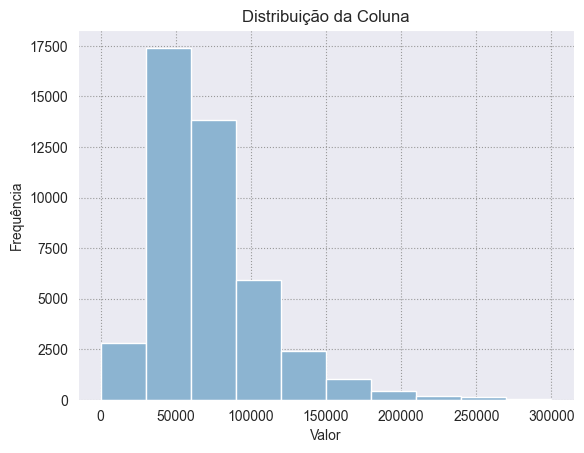

In [287]:
# definindo a quantidade de bins e range do histograma
num_bins = 10
range_values = (0, 300000)

# plotando o histograma
df.income.hist(bins=num_bins, range=range_values)

# adicionando títulos e labels
plt.title('Distribuição da Coluna')
plt.xlabel('Valor')
plt.ylabel('Frequência')

plt.show()

Pelo histograma pode-se perceber que a frequência da renda começa a decair quando ultrapassa 200000. Plotarei um boxplot contendo o dataset original e o dataset com a renda inferior a tal quantia.

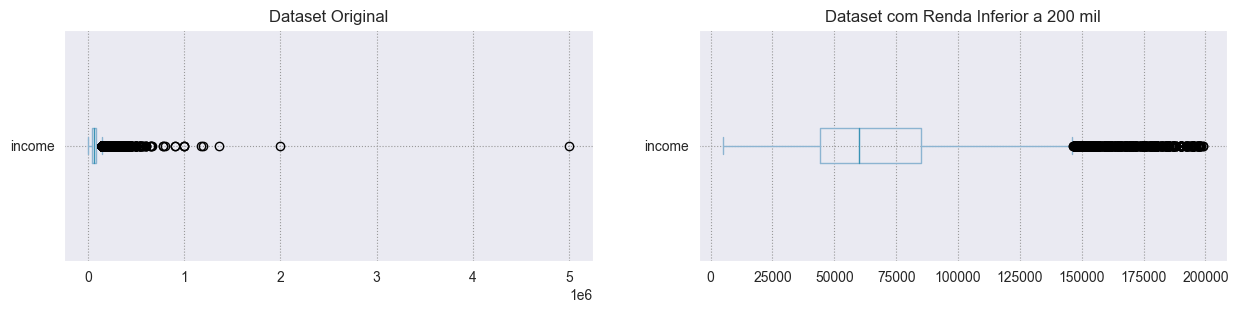

777 Entradas acima de 200 mil
Representam 1.73% do dataset


In [288]:
# verificar o conjunto de dados original
fig, ax = plt.subplots(1, 2, figsize=(15,3))
df.income.plot(kind='box', vert=False, ax = ax[0]);
df.income.loc[df.income <= 200000].plot(kind='box', vert=False, ax = ax[1]);
ax[0].set_title('Dataset Original')
ax[1].set_title('Dataset com Renda Inferior a 200 mil')
plt.show()

print("{} Entradas acima de 200 mil".format(len(df[df.income > 200000])))
print("Representam {:.2f}% do dataset".format((len(df[df.income > 200000]) / df.shape[0])*100))

Pela visualização de dados, pode-se notar que a variável `income` possui uma grande presença de outliers. Há 777 entradas com renda acima de 200 mil, que representam 1.73% do dataset.

A variável `reported_income` possui valor inf em sua coluna, iremos verificar o quanto eles representam o dataset.

In [289]:
# Conferir a quantidade de valores inf em `reported_income`
print("{} Entradas com valores inf".format(np.isinf(df['reported_income']).sum()))
print("Representam {:.2f}% do dataset".format((np.isinf(df['reported_income']).sum()/ df.shape[0])*100))

67 Entradas com valores inf
Representam 0.15% do dataset


Como os valores inf representam somente 0.15% do dataset, optei por excluí-los. Irei posteriormente plotar um gráfico de histograma a fim de entender melhor a frequência, bem como as informações estatísticas da variável.

In [290]:
# substituir valores inf por NaN
df['reported_income'] = df['reported_income'].replace([np.inf, -np.inf], np.nan)

# deletar valores NaN da coluna reported_income
df = df.dropna(subset=['reported_income'])

In [291]:
df.reported_income.describe()

count              44933.00
mean      10325415545677.84
                ...        
75%               151187.00
max     6355500000111444.00
Name: reported_income, Length: 8, dtype: float64

In [292]:
# Verificar a quantidade com receita máxima reportada
df.loc[df.reported_income == df.reported_income.max()].shape[0]

73

73 usuários tiveram uma receita muito diferente, sendo outliers. Isto pode ser um problema de digitação ou não, mas a discrepância causa dificuldade na visualizar os dados. Então, irei plotar um histograma limitando o range de receita a 300 mil.

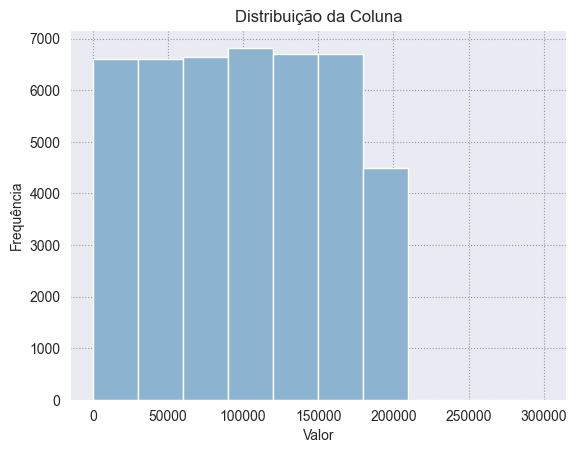

In [293]:
# definindo a quantidade de bins e range do histograma
num_bins = 10
range_values = (0, 300000)

# plotando o histograma
df.reported_income.hist(bins=num_bins, range=range_values)

# adicionando títulos e labels
plt.title('Distribuição da Coluna')
plt.xlabel('Valor')
plt.ylabel('Frequência')

plt.show()

A distribuição da receita reportada difere da receita inserida pelos clientes. Veremos agora se a receita reportada tem variação em frequência para clientes não inadimplentes e inadimplentes.

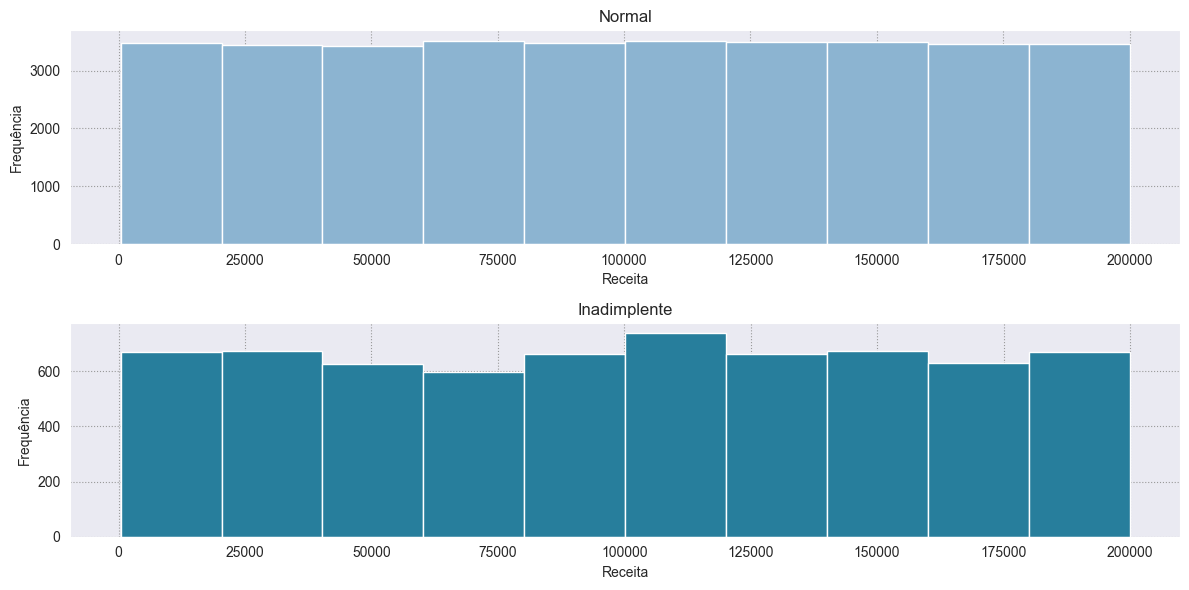

In [294]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))

ax[0].hist(df.reported_income.loc[(df.target_default == False) & (df.reported_income <= 500000)], color=sns.color_palette()[0])
ax[0].set_title('Normal')

ax[1].hist(df.reported_income.loc[(df.target_default == True) & (df.reported_income <= 500000)], color=sns.color_palette()[3])
ax[1].set_title('Inadimplente')

ax[0].set_xlabel('Receita')
ax[0].set_ylabel('Frequência')

ax[1].set_xlabel('Receita')
ax[1].set_ylabel('Frequência')

plt.tight_layout()


A receita reportada aparenta seguir o mesmo padrão para diferentes tipos de clientes.

Verificaremos agora a distribuição do número de falências anteriores do candidato.

In [295]:
df.n_bankruptcies.value_counts()

0.00    40935
1.00     3245
        ...  
4.00        3
5.00        2
Name: n_bankruptcies, Length: 6, dtype: int64

Pode-se observar que a maior parte dos candidatos nunca faliu. Veremos também o número de empréstimos inadimplentes do candidato.

In [296]:
df.n_defaulted_loans.value_counts()

0.00    44185
1.00      152
2.00       17
3.00        4
5.00        1
Name: n_defaulted_loans, dtype: int64

A maior parte dos candidatos nunca teve um empréstimo inadimplentes. Essas informações podem ser devido ao desbalanceamento do dataset.

### Grupo 2: Pontuação e risco

Este grupo engloba as variáveis relacionadas à pontuação de crédito e risco do candidato. As pontuações de crédito `score_1 a score_6` são obtidas de diferentes fontes e servem para avaliar a capacidade do candidato de cumprir com suas obrigações financeiras. A taxa de risco `risk_rate` representa a probabilidade de inadimplência do candidato. A pontuação de fraude do candidato em uma fonte externa `external_data_provider_fraud_score` indica o nível de risco de fraude associado ao candidato.

In [297]:
# separa o conjunto de dados
df_score = df[['score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6', 'risk_rate', 'external_data_provider_fraud_score']]
# visualiza as cinco primeiras entradas
df_score.head()

,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,external_data_provider_fraud_score
0,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.00,101.80,0.26,108.43,0.40,645
1,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.00,97.06,0.94,92.00,0.24,243
2,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.00,100.03,0.35,112.89,0.29,65
3,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.00,101.60,0.99,94.90,0.32,815
4,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.00,98.47,0.53,118.13,0.18,320


Apenas pela visualização das primeiras entradas é possível notar que:
* Os scores 1 e 2 são strings, e os demais estão em escalas diferentes.
* O `score_5` e `risk_rate` variam de 0 a 1.
* O `score_4` e `score_6` aparentam variar de forma semelhante.
* A `external_data_provider_fraud_score` e `score_3` aparentam variar de 0 a 1000.

Observaremos agora informações estatísticas das variáveis.

In [298]:
# ver informações estatísticas
df_score.describe()

,score_3,score_4,score_5,score_6,risk_rate,external_data_provider_fraud_score
count,44371.00,44933.00,44933.00,44933.00,44371.00,44933.00
mean,348.00,100.01,0.50,99.93,0.30,500.38
...,...,...,...,...,...,...
75%,420.00,102.14,0.75,106.64,0.36,747.00
max,990.00,113.98,1.00,142.19,0.90,1000.00


Como os dados estão em padrões diferentes, precisão ser pré-processados posteriormente. Veremos agora tais variáveis num boxplot a fim de visualizar melhor a diferença em escala.

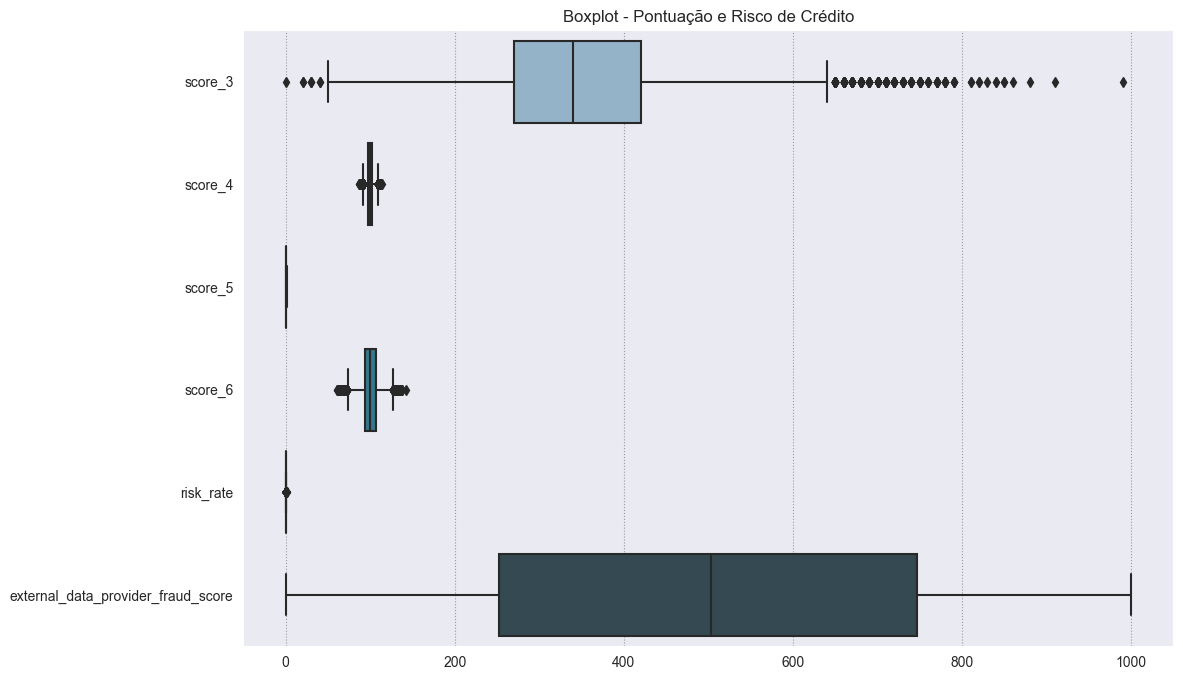

In [299]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.set_palette("PuBuGn_d")
sns.boxplot(df_score, orient="h", ax = ax);
ax.set_title("Boxplot - Pontuação e Risco de Crédito");

### Grupo 3: Empréstimos e histórico financeiro

Este grupo inclui variáveis relacionadas aos empréstimos anteriores. O valor do último empréstimo solicitado `last_amount_borrowed` e o número de meses desde que o último empréstimo foi solicitado `last_borrowed_in_months` fornecem informações sobre a situação financeira recente do candidato. O limite de crédito `credit_limit` ajuda a avaliar a solidez financeira e o histórico de crédito do candidato. O número de meses desde que o candidato forneceu uma resposta satisfatória `ok_since` indica o tempo que o candidato vem mantendo um bom histórico de crédito.

Primeiramente, irei analisar as cinco primeiro entradas do grupo.

In [300]:
df_performance = df[['last_amount_borrowed', 'last_borrowed_in_months', 'credit_limit', 'ok_since']]
df_performance.head()

,last_amount_borrowed,last_borrowed_in_months,credit_limit,ok_since
0,25033.92,36.00,0.00,NaN
1,NaN,NaN,39726.00,50.00
2,7207.92,36.00,NaN,NaN
3,NaN,NaN,54591.00,NaN
4,NaN,NaN,NaN,NaN


A princípio é possível notar que há varios valores ausentes.  Calcularei a proporção.

In [301]:
# Proporção de valores ausentes
(df_performance.isna().sum()/df_performance.shape[0] * 100).sort_values(ascending = False)

last_amount_borrowed      66.57
last_borrowed_in_months   66.57
ok_since                  58.99
credit_limit              30.67
dtype: float64

As variáveis `last_amount_borrowed` e `last_borrowed_in_months` possuem 67% dos dados faltantes. `ok_since` possui 59% e `credit_limit` 31%. Observaremos as informações estatísticas das variáveis.

In [302]:
# Verificar informações estatísticas
df_performance.describe()

,last_amount_borrowed,last_borrowed_in_months,credit_limit,ok_since
count,15019.00,15019.00,31153.00,18428.00
mean,13781.71,41.77,34379.41,35.07
...,...,...,...,...
75%,19219.78,36.00,47085.00,50.00
max,35059.60,60.00,448269.00,141.00


As variáveis `last_amount_borrowed`, `last_borrowed_in_months` e `ok_since` aparentam ter valores coerentes, porém `credit_limit` possui um desvio padrão muito alto, o que pode ser um indicativo da presença de *outliers*. Verificaremos isso visualmente plotando boxplot.

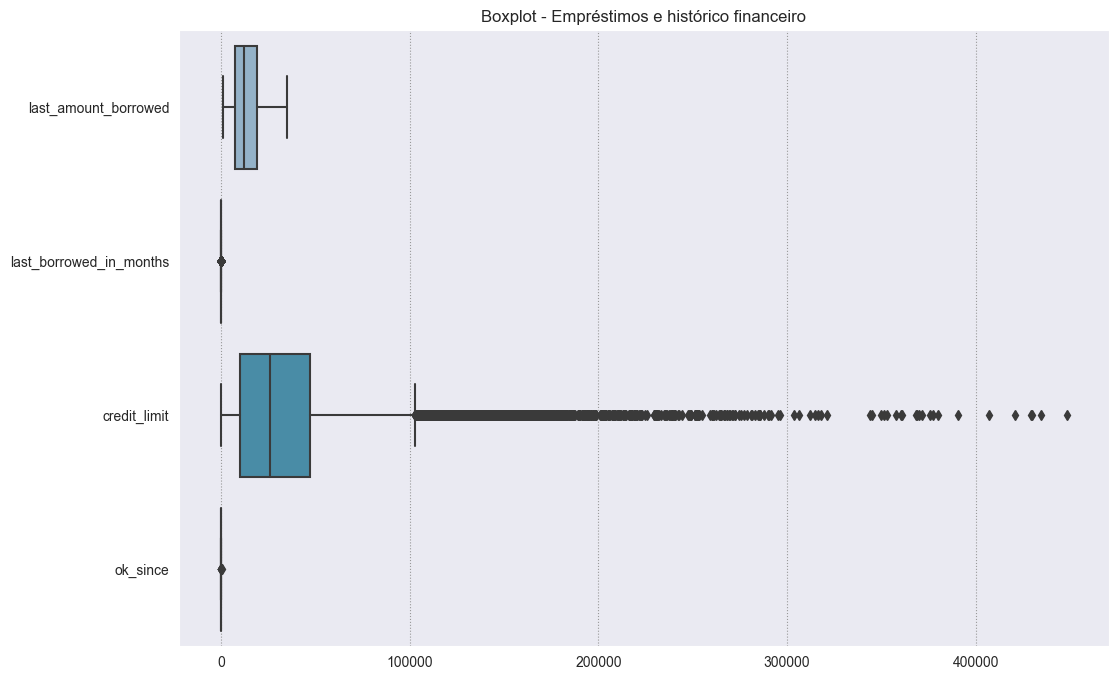

In [303]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.set_palette("PuBuGn_d")
sns.boxplot(df_performance, orient="h", ax = ax);
ax.set_title("Boxplot - Empréstimos e histórico financeiro");

De fato `credit_limit` possui valores de crédito que são considerados *outliers*. O valor máximo de crédito é 448269, sendo a média 34379.

### Grupo 4: Verificações de crédito

Este grupo abrange variáveis relacionadas às verificações de crédito realizadas para o candidato. O número de verificações de crédito nos últimos dois anos `external_data_provider_credit_checks_last_2_year`, no último mês `external_data_provider_credit_checks_last_month` e no último ano `external_data_provider_credit_checks_last_year` fornece uma visão geral da frequência com que o crédito do candidato foi verificado. A variável que indica se o endereço de e-mail do candidato já foi visto antes `external_data_provider_email_seen_before` pode ajudar a identificar possíveis fraudes ou comportamentos de risco.

In [304]:
df_credit = df[['external_data_provider_credit_checks_last_2_year', 'external_data_provider_credit_checks_last_month', 'external_data_provider_credit_checks_last_year', 'external_data_provider_email_seen_before']]
df_credit.head()

,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before
0,NaN,2,0.00,51.00
1,0.00,1,0.00,17.00
2,NaN,2,NaN,9.00
3,NaN,3,NaN,38.00
4,0.00,2,1.00,46.00


Observando as cinco primeiras entradas é possível notar que há valores ausentes. Iremos analisar mais a fundo as variáveis e seu comportamento.

In [305]:
((df_credit.isna().sum()/df_credit.shape[0]) * 100).sort_values(ascending = False)

external_data_provider_credit_checks_last_2_year   50.27
external_data_provider_credit_checks_last_year     33.62
external_data_provider_email_seen_before            4.97
external_data_provider_credit_checks_last_month     0.00
dtype: float64

A variável `external_data_provider_credit_checks_last_2_year` possui 50% dos dados ausentes e `external_data_provider_credit_checks_last_year` 34%. Veremos agora as informações estatísticas.

In [306]:
df_credit.describe()

,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before
count,22343.00,44933.00,29825.00,42702.00
mean,0.00,1.50,0.50,12.54
...,...,...,...,...
75%,0.00,2.00,1.00,43.00
max,0.00,3.00,1.00,59.00


É possível notar que:
* O número de verificação de crédito nos últimos dois anos para todos os candidatos foi 0, ou seja, a coluna `external_data_provider_credit_checks_last_month` não fornece um dado relevante.
* O número de verificação de crédito no último mês checado foi 2 para a maioria dos candidatos.
* A frequência com que o crédito do candidato foi verificado foi 1 para a maioria dos candidatos.
* A variável `external_data_provider_email_seen_before` que indica se o endereço de e-mail do candidato já foi visto antes tem um valor inválido -999. Esta coluna só deveria ter valores positivos.

### Grupo 5: Variáveis-alvo

Este grupo contém as duas variáveis que servem como objetivos principais na análise de dados e na modelagem preditiva. A variável `target_default` indica se o candidato é um bom pagador (0) ou se ele entrou em inadimplência (1), enquanto a variável `target_fraud` indica se o candidato é fraudulento (1) ou não (0). Para a análise em questão, nos preocupamos com a inadimplência, mas avaliaremos o comportamento de ambas.

In [307]:
# Verificar as cinco primeiras entradas
df_target = df[['target_default', 'target_fraud']]
df_target.head()

,target_default,target_fraud
0,False,NaN
1,False,NaN
2,True,NaN
3,False,NaN
4,False,NaN


In [308]:
# Verificar a porcentagem de itens nulos
(df_target.isna().sum()/df_target.shape[0] * 100).sort_values(ascending = False)

target_fraud     96.62
target_default    7.25
dtype: float64

A variável `target_fraud` possui 97% dos dados ausentes, já target_default 7%. Iremos agora verificar o balanceamento da variável alvo `target_default`.

In [309]:
# Quantidade de dados distribuidos por classes
df.target_default.value_counts()

False    35025
True      6650
Name: target_default, dtype: int64

In [310]:
# Porcentagem de dados distribuidos por classes
round(df.target_default.value_counts()/df.shape[0] * 100,2)

False   77.95
True    14.80
Name: target_default, dtype: float64

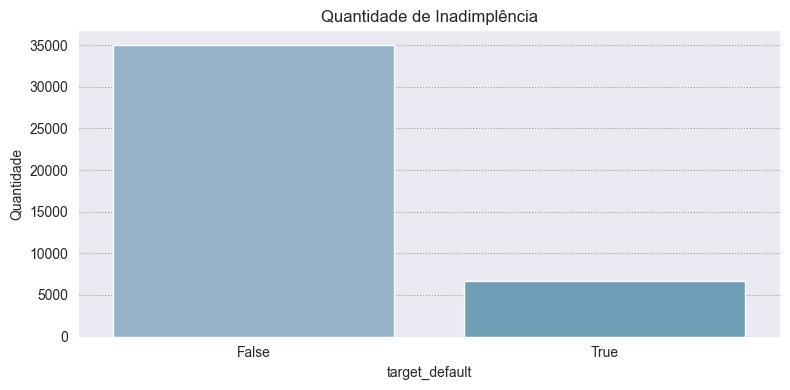

In [311]:
# Plotar um gráfico de barras para ver o balanceamento do *dataset*
fig, ax = plt.subplots(figsize=(8, 4))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_palette("PuBuGn_d")
count = df['target_default'].value_counts()
sns.countplot(x='target_default', data=df)
ax.set_xlabel('target_default')
ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de Inadimplência');
plt.tight_layout()

O dataset é  **desbalanceado**, com 15% de inadimplência. Uma consequência de ter dados desbalanceados é um **modelo enviesado**, que privilegia a classe maioritária. Logo, é necessário um **balanceamento** a fim de construir um modelo eficaz ao problema.


## Feature Engineering

Feature Engineering é o processo de criação e seleção de variáveis (também conhecidas como "features") relevantes para um determinado problema de análise de dados. É uma das etapas mais importantes no desenvolvimento de modelos de Machine Learning, uma vez que a qualidade das variáveis usadas para treinar um modelo pode afetar significativamente sua precisão e capacidade de generalização.

Observando os dados, fareis tais modificações:

* A feature `reported_income` é a renda informada por terceiros e `income` é a renda informada pelo usuário, criarei uma nova variável `difference_income`, que representa a diferença entre essas duas medidas de renda.

Essa diferença pode ser útil em análises posteriores para identificar usuários que podem ter fornecido informações falsas ou imprecisas sobre sua renda. Além disso, pode ser útil para entender melhor a distribuição de renda dos usuários e a precisão das informações fornecidas.

* Alterarei a variável `lat_lon`, criando `latitude` e `longitude`. Também plotarei um mapa de calor para visualizarmos a intensidade de usuários por região.

* Separarei as tags com ocorrência em pelo menos 100 instâncias na variável `profile_tags` e as transformarei em colunas separadas com (0) não presente na instância e (1) presente.

* Extrairei o sistema operacional usado na variável `user_agent`.

In [312]:
# criação da variável nova
df_eng = df.copy()
df_eng['difference_income'] = df_eng['reported_income'] - df_eng['income']

In [313]:
# observar as cinco primeiras entradas
df_eng['difference_income'].head()

0    -7165.12
1   -95116.91
2    98655.35
3   -67744.01
4   138606.71
Name: difference_income, dtype: float64

In [314]:
# extrair latitude e longitude da coluna lat_lon usando regex
def extract_lat_lon(x):
    try:
        lat_lon = re.findall('\((-?\d+\.\d+), (-?\d+\.\d+)\)', str(x))[0]
        return float(lat_lon[0]), float(lat_lon[1])
    except:
        return None

    
# aplicar a função extract_lat_lon na coluna 'lat_lon' e 
# criar uma nova coluna 'coordinates' com as latitudes e longitudes extraídas
df_eng['coordinates'] = df_eng['lat_lon'].apply(extract_lat_lon)

# remover linhas com coordenadas faltantes
df_eng = df_eng.dropna(subset=['coordinates'])

# criar colunas separadas para latitude e longitude
df_eng['latitude'] = df_eng['coordinates'].apply(lambda x: x[0])
df_eng['longitude'] = df_eng['coordinates'].apply(lambda x: x[1])

# apagar as colunas originais
df_eng = df_eng.drop(['lat_lon', 'coordinates'], axis=1)

df_eng = df_eng.round(2)

points = list(zip(df_eng['latitude'], df_eng['longitude']))

# cria o mapa
m = folium.Map(location=[df_eng['latitude'].mean(), df_eng['longitude'].mean()], zoom_start=4)

# define o gradiente para o mapa de calor
gradient = {0.2: 'green', 0.5: 'yellow', 0.8: 'red'}

# cria o mapa de calor
HeatMap(points, name='Heat Map', gradient=gradient).add_to(m)

m

Pela latitude e longitude, podemos observar que os usuários estão bem distribuídos pelo país.
Abaixo, serão extraídas as tags com frequência maior que 100, e posteriormente transformadas em colunas.

In [315]:
freq_threshold = 100

all_tags = [tag for tag_string in df_eng['profile_tags'] for tag in tag_string.split(';')]

tag_counts = Counter(all_tags)

frequent_tags = set([tag for tag in tag_counts if tag_counts[tag] >= freq_threshold])

unique_tags = [] 
unique_tags = list(frequent_tags)


def extract_tags(tag_string):
    tags = tag_string.split(";")
    tags = [tag.strip() for tag in tags]
    tags = [tag for tag in tags if tag in unique_tags]
    tags_dict = {tag: 1 for tag in tags}
    all_tags_dict = {tag: 0 for tag in unique_tags}
    all_tags_dict.update(tags_dict)
    return all_tags_dict


df_eng['tag_dict'] = df_eng['profile_tags'].apply(extract_tags)

tag_df = pd.DataFrame(df_eng['tag_dict'].tolist(), index=df_eng.index)

df_eng.drop('tag_dict', axis=1, inplace=True)

tag_df.fillna(0, inplace=True)

new_columns = [col.split("'")[3] for col in tag_df.columns]

tag_df.columns = new_columns


In [316]:
# Concatena o df original com o df de tags
df_eng = pd.concat([df_eng, tag_df], axis=1)

# Apaga a coluna profile tags original
df_eng.drop('profile_tags', axis=1, inplace=True)

Veremos abaixo o nosso novo dataframe com tais modificações.

In [317]:
df_eng.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,user_agent,target_fraud,difference_income,latitude,longitude,n2,nim,n15,n3,n1,n11,n10,da,n8,n0,aty,n13,n6,n17,c1,a15,pro+aty,n14,n5,n12,n18,n4,n19,dfa,n9,n16,n7,b19,c55
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.00,101.80,0.26,108.43,0.40,25033.92,36.00,0.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.00,0.00,18.00,18.00,07:52:34,444,outlook.com,NaN,2,0.00,51.00,leidelaura,645,Invite-email,514-9840782,57849.00,MT,17528,Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN,-7165.12,-29.15,-51.14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.00,97.06,0.94,92.00,0.24,NaN,NaN,39726.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.00,0.00,0.00,14.00,14.00,02:34:29,346,gmail.com,0.00,1,0.00,17.00,diocezio,243,Radio-commercial,251-3659293,4902.00,RS,40933,Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN,-95116.91,-19.69,-47.94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.00,100.03,0.35,112.89,0.29,7207.92,36.00,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.00,0.00,10.00,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.00,veralucia,65,Waiting-list,230-6097993,163679.00,RR,50985,Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN,98655.35,-28.75,-51.87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.00,101.60,0.99,94.90,0.32,NaN,NaN,54591.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.00,0.00,19.00,19.00,11:20:49,406,spgov.com,NaN,3,NaN,38.00,venice,815,Waiting-list,261-3543751,1086.00,RN,37825,Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN,-67744.01,-17.52,-39.76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.00,98.47,0.53,118.13,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.00,0.00,11.00,NaN,13:39:03,240,gmail.com,0.00,2,1.00,46.00,darzisa,320,Invite-email,102-3660162,198618.00,MT,52827,Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN,138606.71,-16.57,-39.91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Por fim, será extraído informações sobre o sistema operacional.

In [318]:
os_regex = re.compile(r'linux|iphone|windows|x11|mac', re.IGNORECASE)
linux_regex = re.compile(r'linux|x11', re.IGNORECASE)
iphone_regex = re.compile(r'iphone', re.IGNORECASE)
windows_regex = re.compile(r'windows', re.IGNORECASE)
mac_regex = re.compile(r'(?<!i)mac', re.IGNORECASE)

os_info = []
for user_agent in df_eng['user_agent']:
    if isinstance(user_agent, str):
        if re.search(linux_regex, user_agent):
            os_info.append('Linux')
        elif re.search(iphone_regex, user_agent):
            os_info.append('iPhone')
        elif re.search(windows_regex, user_agent):
            os_info.append('Windows')
        elif re.search(mac_regex, user_agent):
            os_info.append('Mac')
        else:
            os_info.append('Other')
    else:
        os_info.append('Other')

df_eng['os_info'] = os_info


In [319]:
df_eng['os_info'].value_counts()

Linux      28721
iPhone      8929
Windows     3477
Mac         1741
Other        703
Name: os_info, dtype: int64

Pode-se observar que os usuários utilizam em maior frequência Linux, iPhone, Windows e Mac respectivamente.

## Divisão do Conjunto de Dados

Antes de realizar o pré-processamento dos dados, irei separar o conjunto de teste que validará a eficácia do modelo. É importante que o mesmo seja capaz de generalizar para evitar problemas como o *underfitting*, que ocorre quando o modelo tem baixo desempenho tanto no treinamento quanto na validação, ou o *overfitting*, que ocorre quando o modelo se adapta demasiadamente ao treinamento e não consegue generalizar para novos dados. A separação antes da padronização ocorre para que os dados de teste não tenham contato com os de treino e validação, simulando uma situação real.

Existem vários métodos de divisão de dados disponíveis para evitar esses problemas. Neste caso, adotaremos a proporção de **70/15/15** para o conjunto de treinamento, validação e teste, respectivamente.

### Separando o conjunto de teste

In [454]:
# criando o conjunto de teste
test = df_eng.sample(frac=0.15, random_state=0)

# verificando o conjunto
print(test.shape)
test.head()

(5555, 74)


,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,user_agent,target_fraud,difference_income,latitude,longitude,n2,nim,n15,n3,n1,n11,n10,da,n8,n0,aty,n13,n6,n17,c1,a15,pro+aty,n14,n5,n12,n18,n4,n19,dfa,n9,n16,n7,b19,c55,os_info
24509,5c884f57-ffa8-4e36-e4f1-446c6263eea4,NaN,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,390.00,95.36,0.51,116.62,0.36,NaN,NaN,16499.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,50017.13,True,bNDXnbe7XAx/VUe+cbjDiw==,4UkFK78e10P483RunaoIWA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.00,0.00,8.00,8.00,07:41:10,49,gmail.com,NaN,2,0.00,53.00,deuzelina,743,Invite-web,195-1131837,184011.00,MS,49824,Mozilla/5.0 (Linux; Android 6.0.1; SHIELD Tabl...,NaN,133993.87,-19.78,-40.17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Linux
20644,aecca176-8455-ae1d-6b68-ae459af79e75,False,DGCQep2AE5QRkNCshIAlFQ==,7h+tk4z7O9brtBSe1rNjxA==,340.00,102.04,0.95,109.19,0.31,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,144031.74,False,fR2lwAMjCb/fNXjsApiOTw==,rvdltYNojzCjA1gRsbX9fA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.00,0.00,11.00,NaN,07:09:02,363,outlook.com,0.00,3,1.00,56.00,remerson,590,Waiting-list,232-6264265,53105.00,AM,12886,Mozilla/5.0 (iPhone; CPU iPhone OS 11_0 like M...,NaN,-90926.74,-17.75,-53.29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,iPhone
23092,0ed315cd-c451-171e-1878-8fa77086a97c,False,DGCQep2AE5QRkNCshIAlFQ==,7h+tk4z7O9brtBSe1rNjxA==,360.00,99.65,0.13,102.88,0.22,20039.77,36.00,0.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,128028.94,False,xsd3ZdsI3356I3xMxZeiqQ==,IkavYIMybwGTChPpS3dJ6Q==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,37.00,0.00,0.00,5.00,5.00,21:24:48,248,gmail.com,0.00,2,NaN,34.00,chrystianne,971,Facebook,389-6340718,151969.00,AM,29079,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 6P Bu...,NaN,23940.06,-19.35,-42.93,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Linux
7387,c6f6ff0e-659b-e776-1fc8-425d2fd5a5a4,False,DGCQep2AE5QRkNCshIAlFQ==,osCzpM4hJrxugqWWuZmMWw==,390.00,98.11,0.03,82.68,0.25,7508.72,36.00,14377.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,96016.47,True,GW2VZ3dN3OGHSjQ6JkfqQw==,hKNrx1SIxunqIpoE9PPlow==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,47.00,0.00,0.00,9.00,9.00,09:00:04,113,spgov.com,NaN,0,NaN,8.00,ocimara,355,Radio-commercial,637-6937648,102730.00,SP,43472,Mozilla/5.0 (iPhone; CPU iPhone OS 11_0 like M...,NaN,6713.53,-27.05,-51.14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,iPhone
17240,caf0fd84-38e6-92e6-7034-87dfc38a9f23,False,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,220.00,101.30,0.90,100.63,0.31,NaN,NaN,6825.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,55010.81,False,BB/zpwTH+8GCIVHlhzOU1Q==,VzBKsWnQK586ThbTygkUmA==,NCqL3QBx0pscDnx3ixKwXg==,NaN,nSpvDsIsslUaX6GE6m6eQA==,17.00,0.00,0.00,8.00,8.00,13:43:06,410,hotmail.com,0.00,3,0.00,59.00,estela,622,Twitter,402-9630815,191296.00,RO,54047,"Mozilla/5.0 (iPhone9,3; U; CPU iPhone OS 10_0_...",NaN,136285.19,-8.96,-45.65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,iPhone


In [321]:
# drop das linhas de teste
df_eng = df_eng.drop(test.index)

# verificando o shape do df
df_eng.shape

(37035, 74)

In [322]:
# resetando o index dos conjuntos
df_eng.reset_index()
test.reset_index()

,index,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,user_agent,target_fraud,difference_income,latitude,longitude,n2,nim,n15,n3,n1,n11,n10,da,n8,n0,aty,n13,n6,n17,c1,a15,pro+aty,n14,n5,n12,n18,n4,n19,dfa,n9,n16,n7,b19,c55,os_info
0,38634,5f5295d3-7a1f-b700-e18c-66a0237d7b2a,False,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,390.00,99.26,0.51,87.93,0.42,NaN,NaN,82064.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,120012.59,False,ygE7OTdsxRMLeXMa0EZwZw==,/V6UxFTnY2XT8JoKjpdriw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.00,0.00,11.00,11.00,07:04:10,196,hotmail.com,0.00,0,1.00,55.00,rineldo,883,Radio-commercial,698-6889690,186530.00,AM,33177,Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) Apple...,NaN,66517.41,-19.31,-41.29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Linux
1,31691,7077e360-b5a3-7a9c-1742-e6fff44f37b6,NaN,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,160.00,102.82,0.92,97.20,0.33,NaN,NaN,25000.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,110053.89,False,xsd3ZdsI3356I3xMxZeiqQ==,ERh0Pv9tBRaSHHlPYzVZvQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,47.00,0.00,0.00,7.00,7.00,08:29:32,327,outlook.com,NaN,1,NaN,43.00,abrahan,750,NaN,408-6602836,199550.00,SE,23314,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NaN,89496.11,-9.28,-62.02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6534,23973,ad1931e0-7b05-d22e-4de5-d8c354d00eb6,NaN,1Rk8w4Ucd5yR3KcqZzLdow==,rJZgTmANW3PjOCQLCcp4iQ==,480.00,99.69,0.45,86.11,0.25,NaN,NaN,0.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,43044.65,True,BB/zpwTH+8GCIVHlhzOU1Q==,yEFu/7Nbau9SVX8b8Xmh4A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.00,0.00,12.00,12.00,06:53:30,480,hotmail.com,0.00,1,1.00,38.00,jazer,849,Waiting-list,495-3336540,196573.00,DF,30799,Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) Apple...,NaN,153528.35,-5.42,-49.11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Linux
6535,36856,28cfd9a1-fe6c-c350-42cc-1ea23462593c,False,4DLlLW62jReXaqbPaHp1vQ==,emS9xH8CLoRNie2uSmaDAQ==,420.00,100.86,0.43,93.44,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,70025.71,False,BB/zpwTH+8GCIVHlhzOU1Q==,MXqE7D0NclzbvSzSxV4b/Q==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.00,0.00,12.00,NaN,18:15:28,273,outlook.com,0.00,0,1.00,14.00,sezarina,896,Website,395-7918442,189488.00,MS,52294,Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN,119462.29,0.01,-51.02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Linux


## Pré-processamento dos Dados

O pré-processamento dos dados é uma etapa fundamental em análise de dados, que envolve a limpeza, transformação e integração de dados brutos para prepará-los para análise. Essa etapa pode ser crucial para a qualidade e confiabilidade dos resultados da análise, já que dados incompletos, inconsistentes ou irrelevantes podem afetar negativamente os resultados finais.

Para otimizar a qualidade dos dados utilizados no modelo, foram realizadas diversas etapas de pré-processamento. Em primeiro lugar, optou-se por remover a feature `target_fraud`, uma vez que 97% dos valores eram ausentes, o que comprometeria a capacidade do modelo de aprender a relação entre essa feature e as demais. As features `external_data_provider_credit_checks_last_2_year` e `ids` também foram removidas, já que não forneciam informações relevantes.

O valor -999 encontrado na feature `external_data_provider_email_seen_before` foi removido, visto que é um dado inconsistente. Para preencher os valores faltantes em outras features numéricas, como `last_amount_borrowed`, `last_borrowed_in_months`, `external_data_provider_credit_checks_last_year`, `ok_since`, `n_issues` e `credit_limit`, utilizou-se a mediana, uma medida robusta que minimiza a influência de outliers.

Algumas features foram eliminadas por exigirem uma análise mais aprofundada. Além disso, para minimizar o impacto de valores ausentes, foram removidas as linhas que continham menos de 7% de valores preenchidos. Já para as features categóricas, optou-se por preencher os valores ausentes com os valores mais frequentes.

Essas etapas de pré-processamento contribuem para garantir a qualidade e confiabilidade dos dados utilizados no modelo, e são fundamentais para obter resultados precisos e relevantes.

In [435]:
def clean_data(df_clean):
    # Remove target_fraud, external_data_provider_credit_checks_last_2_year e ids
    df_clean.drop(columns=['target_fraud', 'external_data_provider_credit_checks_last_2_year', 'ids'], axis=1, inplace=True)

    # Remove as linhas que contem o valor -999.0 de external_data_provider_email_seen_before
    df_clean.drop(index=df_clean[df_clean['external_data_provider_email_seen_before'] == -999.0].index, inplace=True)

    # Preencher features numéricas com a mediana
    columns_to_fill = ['last_amount_borrowed', 'last_borrowed_in_months', 'external_data_provider_credit_checks_last_year',
                       'ok_since', 'n_issues', 'credit_limit']

    for column in columns_to_fill:
        df_clean[column] = df_clean[column].fillna(df_clean[column].median())

    # Eliminar colunas sem informação aparente ou que demandam mais pesquisa
    drop_var = ['zip', 'job_name', 'external_data_provider_first_name', 'state', 'real_state',
                'shipping_zip_code', 'user_agent', 'profile_phone_number', 'application_time_applied']
    df_clean.drop(labels=drop_var, axis=1, inplace=True)

    # Remover linhas de features que representam menos que 7% do dataset
    cols_to_dropna = ['target_default',  'external_data_provider_email_seen_before', 'n_bankruptcies', 
                      'n_defaulted_loans', 'n_accounts', 'channel', 'score_1', 'score_3', 
                      'risk_rate', 'income', 'score_2']

    df_clean.dropna(subset=cols_to_dropna, axis=0, inplace=True)
    
    # Preencher variáveis categóricas com os valores mais frequentes
    cat_df = df_clean.select_dtypes(include='object').columns

    # variáveis categóricas
    imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    imputer = imputer.fit(df_clean.loc[:,cat_df])
    df_clean.loc[:,cat_df] = imputer.transform(df_clean.loc[:,cat_df])

    return df_clean

In [436]:
df_clean = df_eng.copy()

#realiza a limpeza nos dados
df_clean = clean_data(df_clean)

# verifica as cinco primeiras entradas
df_clean.head()

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,channel,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,email,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,marketing_channel,reported_income,shipping_state,difference_income,latitude,longitude,n2,nim,n15,n3,n1,n11,n10,da,n8,n0,aty,n13,n6,n17,c1,a15,pro+aty,n14,n5,n12,n18,n4,n19,dfa,n9,n16,n7,b19,c55,os_info
0,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.00,101.80,0.26,108.43,0.40,25033.92,36.00,0.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,NCqL3QBx0pscDnx3ixKwXg==,32.00,0.00,0.00,18.00,18.00,444,outlook.com,2,0.00,51.00,645,Invite-email,57849.00,MT,-7165.12,-29.15,-51.14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Linux
1,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.00,97.06,0.94,92.00,0.24,12024.36,36.00,39726.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,NCqL3QBx0pscDnx3ixKwXg==,50.00,0.00,0.00,14.00,14.00,346,gmail.com,1,0.00,17.00,243,Radio-commercial,4902.00,RS,-95116.91,-19.69,-47.94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Linux
2,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.00,100.03,0.35,112.89,0.29,7207.92,36.00,25627.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,False,NCqL3QBx0pscDnx3ixKwXg==,32.00,0.00,0.00,10.00,10.00,6,gmail.com,2,1.00,9.00,65,Waiting-list,163679.00,RR,98655.35,-28.75,-51.87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Linux
3,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.00,101.60,0.99,94.90,0.32,12024.36,36.00,54591.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,NCqL3QBx0pscDnx3ixKwXg==,32.00,1.00,0.00,19.00,19.00,406,spgov.com,3,1.00,38.00,815,Waiting-list,1086.00,RN,-67744.01,-17.52,-39.76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Linux
4,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.00,98.47,0.53,118.13,0.18,12024.36,36.00,25627.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,NCqL3QBx0pscDnx3ixKwXg==,32.00,0.00,0.00,11.00,10.00,240,gmail.com,2,1.00,46.00,320,Invite-email,198618.00,MT,138606.71,-16.57,-39.91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Linux


Verificaremos abaixo a porcentagem de itens nulos.

In [326]:
# Verificar a porcentagem de item nulo
round(df_clean.isnull().sum()/df_clean.shape[0] * 100, 2).sort_values(ascending = False)

target_default                                    0.00
c1                                                0.00
nim                                               0.00
n15                                               0.00
n3                                                0.00
n1                                                0.00
n11                                               0.00
n10                                               0.00
da                                                0.00
n8                                                0.00
n0                                                0.00
aty                                               0.00
n13                                               0.00
n6                                                0.00
n17                                               0.00
a15                                               0.00
longitude                                         0.00
pro+aty                                           0.00
n14       

As variáveis `target_default` e `facebook_profile` serão codificada em 0 ou 1, por apresentarem apenas as opções True/False. Também irei padronizar as colunas numéricas e codificar as demais colunas categóricas, para isso utilizarei o Hashing Encoder e Label Encoder.

In [327]:
from category_encoders import HashingEncoder

def preprocess_data(df):
    # Cria o LabelEncoder
    le = LabelEncoder()

    # Aplica o Encoder nas colunas 'target_default' e 'facebook_profile'
    df['target_default'] = le.fit_transform(df['target_default'])
    df['facebook_profile'] = le.fit_transform(df['facebook_profile'])
    
    
    cols_to_exclude = ['n16', 'a15', 'c1', 'n14', 'pro+aty', 'dfa', 'da', 'n18', 'n12', 'n17', 
                   'n4', 'c55', 'n1', 'n10', 'n7', 'nim', 'n3', 'n5', 'n11', 'n15', 'n19', 
                   'aty', 'n0', 'n13', 'n9', 'n6', 'b19', 'n8', 'n2', 'target_default', 'facebook_profile']

    for col in cols_to_exclude:
        if col not in df.columns:
            print(f"Column {col} is not in the dataframe")

    cols_to_scale = [col for col in df.columns if col not in cols_to_exclude and df[col].dtype != 'object']
    
    scaler = StandardScaler()
    df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale].values)

    columns_to_hash_encode = ['reason', 'channel', 'email', 'marketing_channel', 'shipping_state', 'os_info']
    hash_encoder = HashingEncoder()

    for column in columns_to_hash_encode:
        hash_encoded_data = hash_encoder.fit_transform(df[column])
        hash_encoded_data.columns = [f"{column}_{col}" for col in hash_encoded_data.columns]
        df = pd.concat([df, hash_encoded_data], axis=1)
        df.drop(column, axis=1, inplace=True)


    cat_cols = ['score_1', 'score_2']

    for col in cat_cols:
        df[col+'_encoded'] = LabelEncoder().fit_transform(df[col])
        df.drop(col, axis=1, inplace=True)

    return df


In [328]:
# Visualizar as primeiras entradas do dataset
encoded_df = preprocess_data(df_clean)
encoded_df.head()

,target_default,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,facebook_profile,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,difference_income,latitude,longitude,n2,nim,n15,n3,n1,n11,n10,da,n8,n0,aty,n13,n6,n17,c1,a15,pro+aty,n14,n5,n12,n18,n4,n19,dfa,n9,n16,n7,b19,c55,reason_col_0,reason_col_1,reason_col_2,reason_col_3,reason_col_4,reason_col_5,reason_col_6,reason_col_7,channel_col_0,channel_col_1,channel_col_2,channel_col_3,channel_col_4,channel_col_5,channel_col_6,channel_col_7,email_col_0,email_col_1,email_col_2,email_col_3,email_col_4,email_col_5,email_col_6,email_col_7,marketing_channel_col_0,marketing_channel_col_1,marketing_channel_col_2,marketing_channel_col_3,marketing_channel_col_4,marketing_channel_col_5,marketing_channel_col_6,marketing_channel_col_7,shipping_state_col_0,shipping_state_col_1,shipping_state_col_2,shipping_state_col_3,shipping_state_col_4,shipping_state_col_5,shipping_state_col_6,shipping_state_col_7,os_info_col_0,os_info_col_1,os_info_col_2,os_info_col_3,os_info_col_4,os_info_col_5,os_info_col_6,os_info_col_7,score_1_encoded,score_2_encoded
0,0,0.03,0.57,-0.83,0.85,1.03,2.71,-0.26,-1.04,-0.11,1,-0.10,-0.28,-0.06,1.61,1.83,07:52:34,1.34,0.44,-1.43,1.28,0.51,-0.04,-0.04,-1.75,-0.58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,10
1,0,0.21,-0.92,1.53,-0.79,-0.54,-0.10,-0.26,0.29,0.54,0,1.19,-0.28,-0.06,0.74,0.82,02:34:29,0.67,-0.46,-1.43,-0.62,-0.89,-0.04,-0.04,-0.60,-0.16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,3,16
2,1,0.12,0.01,-0.52,1.29,-0.05,-1.14,-0.26,-0.18,-0.11,0,-0.10,-0.28,-0.06,-0.14,-0.19,00:60:02,-1.65,0.44,0.70,-1.06,-1.51,-0.04,-0.04,-1.70,-0.68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,3,9
3,0,1.48,0.50,1.70,-0.50,0.25,-0.10,-0.26,0.78,-0.04,0,-0.10,3.39,-0.06,1.83,2.08,11:20:49,1.08,1.34,0.70,0.55,1.10,-0.04,-0.04,-0.33,0.92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,21
4,0,1.39,-0.48,0.11,1.81,-1.13,-0.10,-0.26,-0.18,-0.20,1,-0.10,-0.28,-0.06,0.08,-0.19,13:39:03,-0.05,0.44,0.70,1.00,-0.62,-0.04,-0.04,-0.22,0.90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2,1


Com as features devidamente tratadas, irei plotar uma matriz de correlação das variáveis com a variável alvo `target_default`.

In [329]:
column_names = encoded_df.columns.tolist()
print(column_names)

['target_default', 'score_3', 'score_4', 'score_5', 'score_6', 'risk_rate', 'last_amount_borrowed', 'last_borrowed_in_months', 'credit_limit', 'income', 'facebook_profile', 'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'n_issues', 'application_time_applied', 'application_time_in_funnel', 'external_data_provider_credit_checks_last_month', 'external_data_provider_credit_checks_last_year', 'external_data_provider_email_seen_before', 'external_data_provider_fraud_score', 'reported_income', 'difference_income', 'latitude', 'longitude', 'n2', 'nim', 'n15', 'n3', 'n1', 'n11', 'n10', 'da', 'n8', 'n0', 'aty', 'n13', 'n6', 'n17', 'c1', 'a15', 'pro+aty', 'n14', 'n5', 'n12', 'n18', 'n4', 'n19', 'dfa', 'n9', 'n16', 'n7', 'b19', 'c55', 'reason_col_0', 'reason_col_1', 'reason_col_2', 'reason_col_3', 'reason_col_4', 'reason_col_5', 'reason_col_6', 'reason_col_7', 'channel_col_0', 'channel_col_1', 'channel_col_2', 'channel_col_3', 'channel_col_4', 'channel_col_5', 'channel_col_6', 'c

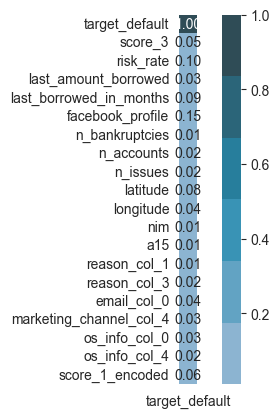

In [330]:
# Create a correlation dataframe with only 'target_default' column
corr_df = encoded_df.corr(method='pearson')['target_default']

# Select the features with correlation coefficient >= 0.01
corr_df = corr_df[corr_df >= 0.01]

# Plot the heatmap for the filtered dataframe
sns.heatmap(corr_df.to_frame(), fmt='.2f',square = True, linecolor = 'white', annot = True, cmap = sns.color_palette("PuBuGn_d"));


As variáveis com maior correlação positiva com a `target_default` foram: `facebook_profile`, `risk_rate`, `last_borrewed_in_months` e `score_1_encoded`.
Na exibição acima, apenas demonstrei correlações positivas acima de 0.01 com a variável alvo.

## Feature Selection

Feature selection é o processo de selecionar um subconjunto relevante de características (features) a partir de um conjunto maior de variáveis em um conjunto de dados. O objetivo é identificar as características mais informativas e significativas que contribuem para a tarefa de modelagem ou análise, eliminando aquelas que são redundantes, irrelevantes ou prejudiciais ao desempenho do modelo.

A correlação de Pearson é uma medida paramétrica que avalia a relação linear entre duas variáveis contínuas. Ela varia de -1 a 1, onde 1 indica uma correlação positiva perfeita, -1 indica uma correlação negativa perfeita e 0 indica ausência de correlação. Ao aplicar a correlação de Pearson para realizar a seleção de características, é possível calcular a correlação entre cada par de características e a variável-alvo. Em seguida, as características com correlação mais forte em termos absolutos (mais próximas de 1 ou -1) podem ser selecionadas.

Para o Feature Selection, usaremos a correlação de Pearson como filtro. Vários limites foram testados, sendo os resultados melhores obtidos com um de 0.03, que será utilizado neste estudo. Avaliaremos o modelo com e sem feature selection.

In [351]:
correlation_matrix = encoded_df.corr(method='pearson')
threshold = 0.03
selected_columns = correlation_matrix.index[correlation_matrix['target_default'].abs() >= threshold]
df_pearson = encoded_df[selected_columns]
df_pearson.head()

,target_default,score_3,risk_rate,last_amount_borrowed,last_borrowed_in_months,income,facebook_profile,external_data_provider_email_seen_before,latitude,longitude,email_col_0,marketing_channel_col_4,score_1_encoded
0,0,0.03,1.03,2.71,-0.26,-0.11,1,1.28,-1.75,-0.58,1,0,0
1,0,0.21,-0.54,-0.10,-0.26,0.54,0,-0.62,-0.60,-0.16,0,1,3
2,1,0.12,-0.05,-1.14,-0.26,-0.11,0,-1.06,-1.70,-0.68,0,0,3
3,0,1.48,0.25,-0.10,-0.26,-0.04,0,0.55,-0.33,0.92,0,0,0
4,0,1.39,-1.13,-0.10,-0.26,-0.20,1,1.00,-0.22,0.90,0,0,2


## Modelo de Machine Learning

Com o conjunto de teste devidamente separado, e os dados posteriores pré-processados, iremos criar o conjunto de treino e validação. Utilizaremos o teste para validar o modelo ao final. Será criado um modelo para os dados normais e com feature selection.

In [437]:
from sklearn.model_selection import train_test_split

# separar as variáveis independentes da variável alvo
X = encoded_df.drop('target_default', axis=1).select_dtypes(exclude='object')
y = encoded_df['target_default']

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, test_size=0.15)

In [438]:
# separar as variáveis independentes da variável alvo
X = df_pearson.drop('target_default', axis=1).select_dtypes(exclude='object')
y = df_pearson['target_default']

# dividir o dataset entre treino e teste
X_train_pearson, X_test_pearson, y_train_pearson, y_test_pearson = train_test_split(X, y, stratify=y, shuffle=True, test_size=0.15)

### Modelo Baseline

Um modelo baseline é um modelo simples e ingênuo que serve como ponto de referência para avaliar a performance de outros modelos mais complexos. Ele é utilizado para comparar a eficácia de diferentes técnicas de modelagem e para avaliar se um novo modelo é melhor do que o modelo mais básico possível.
O objetivo do modelo baseline não é produzir resultados precisos, mas sim fornecer um ponto de partida útil para avaliar o desempenho de outros modelos. Ele ajuda a entender o nível mínimo de desempenho que deve ser superado para que um modelo seja considerado útil e relevante para o problema em questão.

Inicialmente, criarei um modelo baseline. A métrica única utilizada para avaliação será **recall**. O recall indica a proporção de casos positivos (por exemplo, clientes de alto risco de inadimplência) que foram corretamente identificados pelo modelo em relação a todos os casos positivos reais. Ou seja, o recall mede a capacidade do modelo de identificar todos os verdadeiros positivos. Um alto recall é importante para garantir que o modelo não esteja perdendo clientes de alto risco e, portanto, não esteja permitindo que eles obtenham crédito quando não deveriam.

Para a criação do modelo baseline, utilizarei a função  `val_model` que realiza validação cruzada de 10 folders, e o algoritmo **KNeighborsClassifier**. 

In [354]:
def val_model(X, y, clf, quiet=False, metric="recall"):
    """
    Performs cross-validation with training data for a given model.

    # Arguments
        X: DataFrame, contains the independent variables.
        y: Series, vector containing the target variable.
        clf: Scikit-learn classifier model.
        quiet: bool, indicating whether the function should print the results or not.
        metric: str, the evaluation metric to use (default is "recall").

    # Returns
        float: mean of the cross-validation scores.
    """

    X = np.array(X)
    y = np.array(y)

    # Perform cross-validation with the specified metric
    scores = cross_val_score(clf, X, y, cv=10, scoring=metric)

    if not quiet:
        print("{}: {:.2f}".format(metric, scores.mean()))

    return scores.mean()


In [355]:
# Modelo Baseline
knn = KNeighborsClassifier()
f1_mean = val_model(X_train, y_train, knn)

recall: 0.08


## Balanceamento de Dados

### Amostragem

Um dataset que possua mais de 50% das entradas em uma classe já é considerado desbalanceado. A maioria dos algoritmos de aprendizado de máquina funcionam bem com conjuntos de dados equilibrados, uma vez que eles buscam otimizar a precisão geral da classificação ou medidas relacionadas. Para dados **desbalanceados**, os limites de decisões estabelecidos por padrão nos algoritmos tendem a ser **enviesados em torno da classe majoritária**. Portanto a **classe minoritária tende a ser classificada incorretamente.**

Uma maneira de corrigir o problema é por meio de **amostragem** que contém duas técnicas. A técnica de **over-sampling**, consiste em **gerar novos exemplos para a classe minoritária**, de forma a aumentar sua representatividade no conjunto de dados. Já o **under-sampling** **remove** instâncias da **classe majoritária**.

Esses métodos de amostragem, no entanto, possuem **diversas desvantagens** (Weiss, 2004). O under-sampling descarta a exemplos da classe majoritária potencialmente úteis e pode, portanto, degradar o desempenho do classificador. Como o over-sampling introduz casos de treinamento adicionais, pode aumentar o tempo necessário para construir um classificador, e levar a casos de overfitting.

Utilizarei três abordagens, **Random Undersampling** para under-sampling, **Smote** para over-sampling e **Smote Tomek**, que é um modelo híbrido.

### RandomUnderSampler

O **RandomUnderSampler** é uma técnica de undersampling, usada para lidar com conjuntos de dados desbalanceados, onde uma das classes é muito menor do que as outras. A ideia por trás do undersampling é reduzir a quantidade de amostras da classe majoritária para equilibrar as proporções entre as classes. O RandomUnderSampler é uma técnica simples que **remove aleatoriamente amostras da classe majoritária** até que o número de amostras na classe majoritária corresponda ao número de amostras da classe minoritária. Essa técnica pode ser eficaz para reduzir o viés do modelo em direção à classe majoritária e melhorar a precisão das previsões para a classe minoritária.

In [439]:
from imblearn.under_sampling import RandomUnderSampler

# instanciando o RandomUnderSampler
rus = RandomUnderSampler(random_state=42, sampling_strategy="majority")

# aplicando o RandomUnderSampler ao conjunto de dados normais
X_under, y_under = rus.fit_resample(X_train, y_train)

# aplicando o RandomUnderSampler ao conjunto de dados com feature selection
X_under_pearson, y_under_pearson = rus.fit_resample(X_train_pearson, y_train_pearson)

In [440]:
# Visualizando o tamanho do conjunto de treinamento
print("Tamanho do y_train:", np.shape(y_train))

# Visualizando o tamanho do conjunto balanceado
print("Tamanho do y_resampled:", np.shape(y_under))

Tamanho do y_train: (27237,)
Tamanho do y_resampled: (8630,)


Pode-se perceber que as instâncias diminuiram significativamente. Agora iremos verificar o balanceamento das classes.

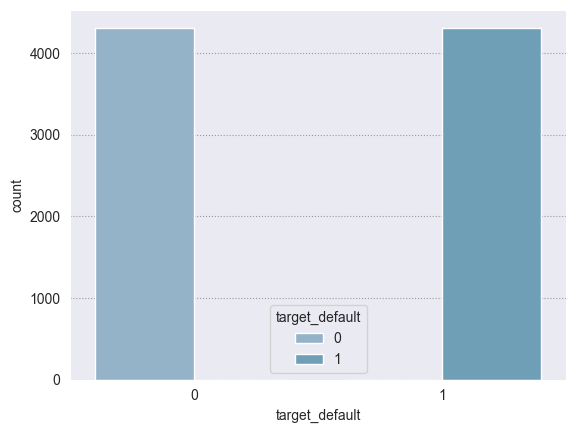

In [441]:
# plotar a nova distribuição de classes
sns.countplot(x=y_under, hue=y_under);

### SMOTE

SMOTE (Synthetic Minority Over-sampling Technique) é uma técnica de **over-sampling** amplamente utilizada em problemas de classificação em que a classe minoritária é significativamente menor do que a classe majoritária. Essa técnica é útil porque muitos algoritmos de aprendizado de máquina são sensíveis ao desbalanceamento de classes e tendem a ter um desempenho pior quando a classe minoritária é sub-representada. A técnica funciona selecionando um exemplo da classe minoritária e encontrando os seus k vizinhos mais próximos. Em seguida, ela **cria novos exemplos sintéticos** interpolando aleatoriamente os atributos dos exemplos selecionados e adicionando-os ao conjunto de dados.

In [442]:
# Criando uma instância do SMOTE
smote = SMOTE()

# Balanceando os dados no conjunto normal
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

# Balanceando os dados no conjunto com feature selection
X_resampled_smote_pearson, y_resampled_smote_pearson = smote.fit_resample(X_train_pearson, y_train_pearson)

Uma instância do **smote** fora criado, e a função fit_resample realizou o balanceamento no conjunto de treino. A seguir a diferença de valores.

In [443]:
# Visualizando o tamanho do conjunto de treinamento
print("Tamanho do y_train:", np.shape(y_train))

# Visualizando o tamanho do conjunto balanceado
print("Tamanho do y_resampled:", np.shape(y_resampled_smote))

Tamanho do y_train: (27237,)
Tamanho do y_resampled: (45844,)


Pode-se perceber que as instâncias aumentaram significativamente. Agora iremos verificar o balanceamento das classes.

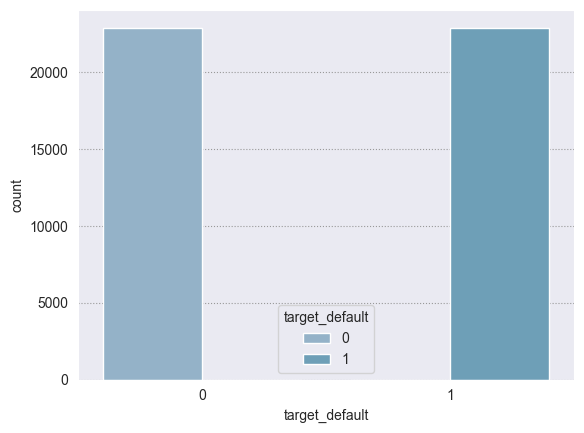

In [444]:
# plotar a nova distribuição de classes
sns.countplot(x=y_resampled_smote, hue=y_resampled_smote);

A classe está balanceada com os dois valores de maneira equalitária.

### SMOTE-TOMEK

SMOTE-TOMEK é uma técnica combinada de balanceamento de classes que combina o oversampling usando SMOTE (Synthetic Minority Over-sampling Technique) com o undersampling usando a técnica de remoção de exemplos próximos chamada de TOMEK (TOMEK Links). Essa abordagem visa combater o desequilíbrio de classes em conjuntos de dados, gerando exemplos sintéticos para a classe minoritária (oversampling) e removendo exemplos ambíguos e próximos entre as classes (undersampling).

In [445]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)

# Balanceando os dados no conjunto normal
X_resampled_stmk, y_resampled_stmk = smote_tomek.fit_resample(X_train, y_train)

# Balanceando os dados no conjunto com feature selection
X_resampled_stmk_pearson, y_resampled_stmk_pearson = smote_tomek.fit_resample(X_train_pearson, y_train_pearson)

A seguir as diferenças na quantidade de instância e o balanceamento.

In [446]:
# Visualizando o tamanho do conjunto de treinamento
print("Tamanho do y_train:", np.shape(y_train))

# Visualizando o tamanho do conjunto balanceado
print("Tamanho do y_resampled:", np.shape(y_resampled_stmk))

Tamanho do y_train: (27237,)
Tamanho do y_resampled: (45834,)


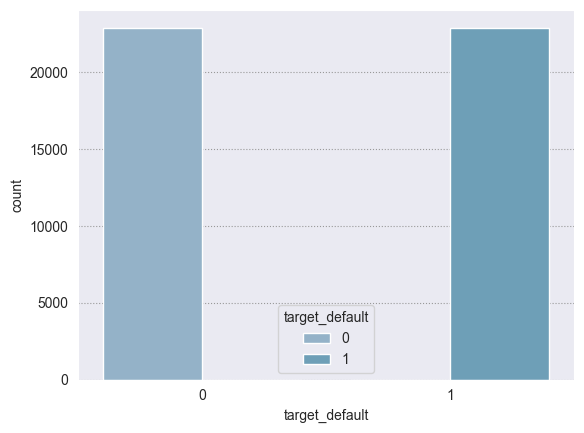

In [447]:
# plotar a nova distribuição de classes
sns.countplot(x=y_resampled_stmk, hue=y_resampled_stmk);

## Treinamento dos Algoritmos de *Machine Learning* 

Para o **treinamento** utilizaremos diversos algoritmos de Machine Learning. Para validar se tivemos um bom resultado com o treinamento, utilizaremos a métrica **recall**, citada previamente. Os modelos descritos abaixo serão instanciados e será realizada uma validação cruzada com 10 folds com o conjunto de dados balanceado com **Smote**. O modelo com a melhor métrica será utilizado nos outros conjuntos com os demais balanceamentos.

* Naive Bayes Gaussian (naive_bayes_gaussian): É um modelo de classificação probabilístico baseado no Teorema de Bayes. É adequado para conjuntos de dados com características numéricas contínuas. Ele assume que as características seguem uma distribuição normal (gaussiana).

* Naive Bayes Bernoulli (naive_bayes_bernoulli): É um modelo de classificação probabilístico baseado no Teorema de Bayes. É adequado para conjuntos de dados binários (com apenas duas classes). Ele assume que cada recurso é binário (sim ou não).

* Árvore de Decisão (decision_tree): É um modelo de classificação que constrói uma árvore de decisão a partir do conjunto de dados de treinamento. A árvore é composta de nós que representam características do conjunto de dados e ramos que representam as decisões com base nessas características.

* K-Nearest Neighbors (knn): É um modelo de classificação que classifica pontos de dados com base na classe das amostras mais próximas a eles. É uma abordagem baseada em instâncias, que armazena todo o conjunto de dados de treinamento.

* Multi-Layer Perceptron (mlp): É um modelo de rede neural artificial com várias camadas de neurônios. É capaz de modelar relações complexas entre entradas e saídas e é frequentemente usado para problemas de classificação e regressão.

* Support Vector Machine (svm): É um modelo de classificação que encontra o hiperplano que melhor separa as amostras de diferentes classes. O SVM é particularmente adequado para conjuntos de dados com muitas dimensões e pode usar diferentes funções kernel para mapear os dados em um espaço de alta dimensionalidade.

* Regressão Logística (lr): É um modelo de classificação que usa a regressão para prever a probabilidade de pertencer a uma determinada classe. Ele usa uma função logística para mapear as entradas em valores de saída que representam a probabilidade de pertencer a uma determinada classe.

* Random Forest (rf): É um modelo de classificação que constrói várias árvores de decisão e as combina para obter uma predição final. Cada árvore é construída a partir de uma amostra aleatória do conjunto de dados de treinamento e em cada nó da árvore, uma seleção aleatória de recursos é considerada.

* Stochastic Gradient Descent Classifier (sgdc): É um modelo de classificação que usa o algoritmo de gradiente descendente estocástico para encontrar os parâmetros do modelo que melhor se ajustam aos dados de treinamento. Ele é particularmente adequado para conjuntos de dados com muitas características e pode usar diferentes funções de perda para modelar diferentes tipos de problemas.

* Extreme Gradient Boosting (xgb): É um modelo de classificação que constrói uma sequência de modelos fracos que são combinados para obter uma predição final. Cada modelo é treinado em um conjunto de dados que é ponderado para se concentrar nas amostras difíceis de classificar.

* LightGBM (lgbm): LGBM é um modelo de aprendizado de máquina baseado em árvore de decisão que utiliza a técnica de boosting, que combina vários modelos mais simples para formar um modelo mais complexo. A técnica de boosting permite que o modelo aprenda com seus erros, melhorando sua precisão e diminuindo o erro ao longo do tempo.

In [369]:
# Instanciando os modelos
naive_bayes_gaussian = GaussianNB()
naive_bayes_bernoulli = BernoulliNB()
decision_tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
mlp = MLPClassifier()
svm = SVC()
lr = LogisticRegression()
rf = RandomForestClassifier()
sgdc = SGDClassifier()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

model = []
recall = []

# avaliar o desempenho (recall)
for clf in (naive_bayes_gaussian, naive_bayes_bernoulli, decision_tree, knn, mlp, svm, lr, rf, sgdc, xgb, lgbm):
    model.append(clf.__class__.__name__)
    recall.append(val_model(X_resampled_smote, y_resampled_smote, clf, quiet=True))

pd.DataFrame(data=recall, index=model, columns=['Recall'])

,Recall
GaussianNB,0.94
BernoulliNB,0.79
DecisionTreeClassifier,0.83
KNeighborsClassifier,1.00
MLPClassifier,0.83
SVC,0.77
LogisticRegression,0.80
RandomForestClassifier,0.82
SGDClassifier,0.80
XGBClassifier,0.83


Ao realizar os testes com diferentes modelos, podemos ver que o `KNeighborsClassifier` retornou os melhores resultados com recall de 1. Como o recall é perfeito, não será necessário otimizar os hiperparâmetros.

## Validação Cruzada - KNeighborsClassifier

Iremos instanciar o modelo usando o KNeighborsClassifier e realizar validação cruzada com o conjunto de treinamento para todas as abordagens citadas previamente.

### RUS

Relatório de Classificação (Conjunto normal):
               precision    recall  f1-score   support

           0     0.5838    0.5956    0.5897      4315
           1     0.5873    0.5754    0.5813      4315

    accuracy                         0.5855      8630
   macro avg     0.5856    0.5855    0.5855      8630
weighted avg     0.5856    0.5855    0.5855      8630

Recall (Conjunto normal): 0.5754

Relatório de Classificação (Feature Selection):
               precision    recall  f1-score   support

           0     0.6037    0.6063    0.6050      4315
           1     0.6046    0.6021    0.6033      4315

    accuracy                         0.6042      8630
   macro avg     0.6042    0.6042    0.6042      8630
weighted avg     0.6042    0.6042    0.6042      8630

Recall (Feature Selection): 0.6021



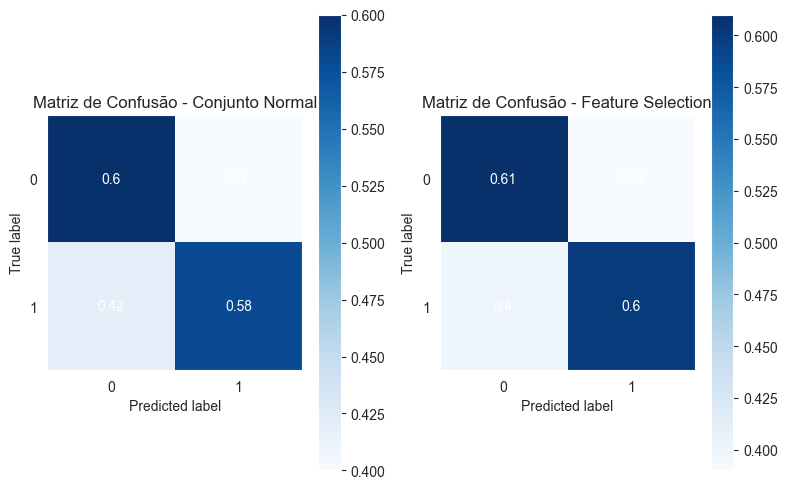

In [448]:
from sklearn.metrics import recall_score

# Instancia o modelo
knn = KNeighborsClassifier()

# Definindo a validação cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True)

# Previsão - Conjunto Normal
y_pred = cross_val_predict(knn, X_under, y_under, cv=cv)

# Relatório de classificação - Conjunto Normal
print("Relatório de Classificação (Conjunto normal):\n", classification_report(y_under, y_pred, digits=4))

recall = recall_score(y_under, y_pred)
print('Recall (Conjunto normal): {:.4f}\n'.format(recall))


# Previsão - Feature Selection
y_pred_new = cross_val_predict(knn, X_under_pearson, y_under_pearson, cv=cv)

# Relatório de classificação - Feature Selection
print("Relatório de Classificação (Feature Selection):\n", classification_report(y_under_pearson, y_pred_new, digits=4))

recall_new = recall_score(y_under_pearson, y_pred_new)
print('Recall (Feature Selection): {:.4f}\n'.format(recall_new))


fig, ax = plt.subplots(1, 2, figsize=(8, 5))

# Primeira matriz de confusão - Conjunto Normal
skplt.metrics.plot_confusion_matrix(y_under, y_pred, normalize=True, ax=ax[0])
ax[0].set_title('Matriz de Confusão - Conjunto Normal')

# Segunda matriz de confusão - Feature Selection
skplt.metrics.plot_confusion_matrix(y_under_pearson, y_pred_new, normalize=True, ax=ax[1])
ax[1].set_title('Matriz de Confusão - Feature Selection')

# Ajusta a posição dos subplots e espaçamento
plt.tight_layout()

# Exibe o gráfico
plt.show()


Para o **RandomUnderSampling**, 

No "**Conjunto normal**":
* Precision (Precisão) para a classe 0 é de 0,5838, o que indica que cerca de 58,38% das instâncias classificadas como 0 são realmente da classe 0.
* Precision para a classe 1 é de 0,5873, o que significa que cerca de 58,73% das instâncias classificadas como 1 são realmente da classe 1.
* Recall (Revocação) para a classe 0 é de 0,5956, indicando que 59,56% das instâncias da classe 0 foram corretamente identificadas.
* Recall para a classe 1 é de 0,5754, o que significa que 57,54% das instâncias da classe 1 foram corretamente identificadas.
* A acurácia do modelo é de 58,55%, ou seja, cerca de 58,55% das instâncias foram classificadas corretamente.

No "**Feature Selection**":
* Precision para a classe 0 é de 0,6037, indicando que cerca de 60,37% das instâncias classificadas como 0 são realmente da classe 0.
* Precision para a classe 1 é de 0,6046, o que significa que cerca de 60,46% das instâncias classificadas como 1 são realmente da classe 1.
* Recall para a classe 0 é de 0,6063, indicando que 60,63% das instâncias da classe 0 foram corretamente identificadas.
* Recall para a classe 1 é de 0,6021, o que significa que 60,21% das instâncias da classe 1 foram corretamente identificadas.
* A acurácia do modelo é de 60,42%, ou seja, cerca de 60,42% das instâncias foram classificadas corretamente.

Em termos gerais, ambos os modelos apresentam desempenho semelhante com pontuações de precisão, recall e acurácia próximas. No entanto, o modelo treinado com a técnica "Feature Selection" mostra uma leve melhoria nos indicadores de precisão e recall para ambas as classes. Isso sugere que a seleção de características teve um impacto positivo no desempenho do modelo. O recall, que representa a capacidade do modelo em identificar corretamente as instâncias positivas, é de aproximadamente 60,21% no "Feature Selection", superando ligeiramente o recall de 57,54% no "Conjunto normal".

### SMOTE

Relatório de Classificação (Conjunto normal):
               precision    recall  f1-score   support

           0     0.9849    0.3840    0.5525     22922
           1     0.6174    0.9941    0.7617     22922

    accuracy                         0.6890     45844
   macro avg     0.8011    0.6890    0.6571     45844
weighted avg     0.8011    0.6890    0.6571     45844

Recall (Conjunto normal): 0.9941

Relatório de Classificação (Feature Selection):
               precision    recall  f1-score   support

           0     0.9397    0.6372    0.7594     22922
           1     0.7255    0.9591    0.8261     22922

    accuracy                         0.7981     45844
   macro avg     0.8326    0.7981    0.7928     45844
weighted avg     0.8326    0.7981    0.7928     45844

Recall (Feature Selection): 0.9591



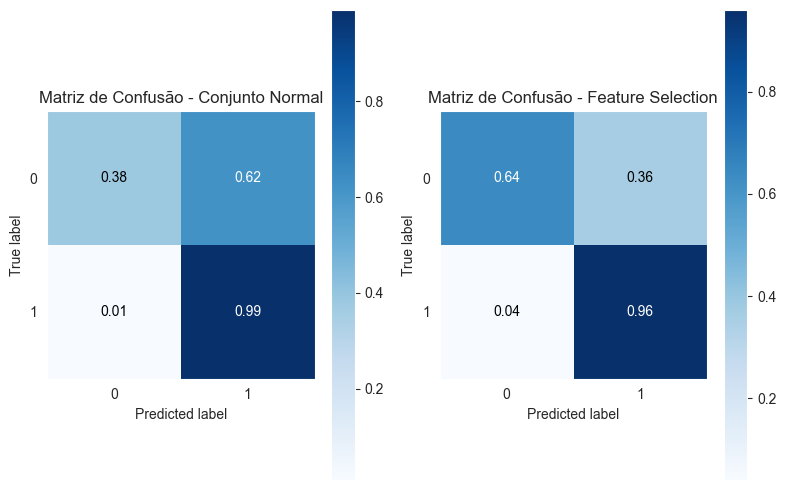

In [449]:
from sklearn.metrics import recall_score

# Instancia o modelo
knn = KNeighborsClassifier()

# Definindo a validação cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True)

# Previsão - Conjunto Normal
y_pred = cross_val_predict(knn, X_resampled_smote, y_resampled_smote, cv=cv)

# Relatório de classificação - Conjunto Normal
print("Relatório de Classificação (Conjunto normal):\n", classification_report(y_resampled_smote, y_pred, digits=4))

recall = recall_score(y_resampled_smote, y_pred)
print('Recall (Conjunto normal): {:.4f}\n'.format(recall))


# Previsão - Feature Selection
y_pred_new = cross_val_predict(knn, X_resampled_smote_pearson, y_resampled_smote_pearson, cv=cv)

# Relatório de classificação - Feature Selection
print("Relatório de Classificação (Feature Selection):\n", classification_report(y_resampled_smote_pearson, y_pred_new, digits=4))

recall_new = recall_score(y_resampled_smote_pearson, y_pred_new)
print('Recall (Feature Selection): {:.4f}\n'.format(recall_new))


fig, ax = plt.subplots(1, 2, figsize=(8, 5))

# Primeira matriz de confusão - Conjunto Normal
skplt.metrics.plot_confusion_matrix(y_resampled_smote, y_pred, normalize=True, ax=ax[0])
ax[0].set_title('Matriz de Confusão - Conjunto Normal')

# Segunda matriz de confusão - Feature Selection
skplt.metrics.plot_confusion_matrix(y_resampled_smote_pearson, y_pred_new, normalize=True, ax=ax[1])
ax[1].set_title('Matriz de Confusão - Feature Selection')

# Ajusta a posição dos subplots e espaçamento
plt.tight_layout()

# Exibe o gráfico
plt.show()


Os resultados do relatório de classificação para os conjuntos "Conjunto normal" e "Feature Selection" (balanceado com **SMOTE**) são os seguintes:

No "**Conjunto normal**":
* Precision para a classe 0 é de 0,9849, o que indica que cerca de 98,49% das instâncias classificadas como 0 são realmente da classe 0.
* Precision para a classe 1 é de 0,6174, o que significa que cerca de 61,74% das instâncias classificadas como 1 são realmente da classe 1.
* Recall para a classe 0 é de 0,3840, indicando que apenas 38,40% das instâncias da classe 0 foram corretamente identificadas.
* Recall para a classe 1 é de 0,9941, o que significa que 99,41% das instâncias da classe 1 foram corretamente identificadas.
* A acurácia do modelo é de 68,90%, ou seja, cerca de 68,90% das instâncias foram classificadas corretamente.

No "**Feature Selection**":
* Precision para a classe 0 é de 0,9397, indicando que cerca de 93,97% das instâncias classificadas como 0 são realmente da classe 0.
* Precision para a classe 1 é de 0,7255, o que significa que cerca de 72,55% das instâncias classificadas como 1 são realmente da classe 1.
* Recall para a classe 0 é de 0,6372, indicando que 63,72% das instâncias da classe 0 foram corretamente identificadas.
* Recall para a classe 1 é de 0,9591, o que significa que 95,91% das instâncias da classe 1 foram corretamente identificadas.
* A acurácia do modelo é de 79,81%, ou seja, cerca de 79,81% das instâncias foram classificadas corretamente.

Comparando os resultados entre os dois conjuntos, podemos observar que o "Feature Selection" apresenta um desempenho geral melhor. A precisão e o recall para a classe 0 aumentaram significativamente em comparação ao "Conjunto normal". Além disso, o "Feature Selection" também apresenta um recall alto para a classe 1, indicando a capacidade de identificar corretamente a maioria das instâncias dessa classe.

### SMOTE-TOMEK

Relatório de Classificação (Conjunto normal):
               precision    recall  f1-score   support

           0     0.9895    0.3819    0.5511     22917
           1     0.6170    0.9959    0.7620     22917

    accuracy                         0.6889     45834
   macro avg     0.8033    0.6889    0.6565     45834
weighted avg     0.8033    0.6889    0.6565     45834

Recall (Conjunto normal): 0.9959

Relatório de Classificação (Feature Selection):
               precision    recall  f1-score   support

           0     0.9503    0.6431    0.7671     22794
           1     0.7303    0.9664    0.8319     22794

    accuracy                         0.8047     45588
   macro avg     0.8403    0.8047    0.7995     45588
weighted avg     0.8403    0.8047    0.7995     45588

Recall (Feature Selection): 0.9664



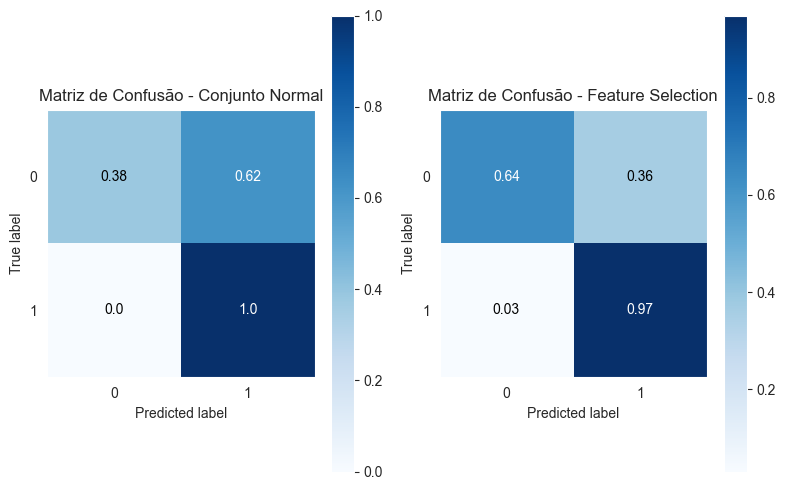

In [450]:
from sklearn.metrics import recall_score

# Instancia o modelo
knn = KNeighborsClassifier()

# Definindo a validação cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True)

# Previsão - Conjunto Normal
y_pred = cross_val_predict(knn, X_resampled_stmk, y_resampled_stmk, cv=cv)

# Relatório de classificação - Conjunto Normal
print("Relatório de Classificação (Conjunto normal):\n", classification_report(y_resampled_stmk, y_pred, digits=4))

recall = recall_score(y_resampled_stmk, y_pred)
print('Recall (Conjunto normal): {:.4f}\n'.format(recall))


# Previsão - Feature Selection
y_pred_new = cross_val_predict(knn, X_resampled_stmk_pearson, y_resampled_stmk_pearson, cv=cv)

# Relatório de classificação - Feature Selection
print("Relatório de Classificação (Feature Selection):\n", classification_report(y_resampled_stmk_pearson, y_pred_new, digits=4))

recall_new = recall_score(y_resampled_stmk_pearson, y_pred_new)
print('Recall (Feature Selection): {:.4f}\n'.format(recall_new))


fig, ax = plt.subplots(1, 2, figsize=(8, 5))

# Primeira matriz de confusão - Conjunto Normal
skplt.metrics.plot_confusion_matrix(y_resampled_stmk, y_pred, normalize=True, ax=ax[0])
ax[0].set_title('Matriz de Confusão - Conjunto Normal')

# Segunda matriz de confusão - Feature Selection
skplt.metrics.plot_confusion_matrix(y_resampled_stmk_pearson, y_pred_new, normalize=True, ax=ax[1])
ax[1].set_title('Matriz de Confusão - Feature Selection')

# Ajusta a posição dos subplots e espaçamento
plt.tight_layout()

# Exibe o gráfico
plt.show()


Os resultados do relatório de classificação para os conjuntos "Conjunto normal" e "Feature Selection" (balanceado com **SMOTE-TOMEK**) são os seguintes:

No "**Conjunto normal**":
* Precision para a classe 0 é de 0,9895, o que indica que cerca de 98,95% das instâncias classificadas como 0 são realmente da classe 0.
* Precision para a classe 1 é de 0,6170, o que significa que cerca de 61,70% das instâncias classificadas como 1 são realmente da classe 1.
* Recall para a classe 0 é de 0,3819, indicando que apenas 38,19% das instâncias da classe 0 foram corretamente identificadas.
* Recall para a classe 1 é de 0,9959, o que significa que 99,59% das instâncias da classe 1 foram corretamente identificadas.
* A acurácia do modelo é de 68,89%, ou seja, cerca de 68,89% das instâncias foram classificadas corretamente.

No "**Feature Selection**":
* Precision para a classe 0 é de 0,9503, indicando que cerca de 95,03% das instâncias classificadas como 0 são realmente da classe 0.
* Precision para a classe 1 é de 0,7303, o que significa que cerca de 73,03% das instâncias classificadas como 1 são realmente da classe 1.
* Recall para a classe 0 é de 0,6431, indicando que 64,31% das instâncias da classe 0 foram corretamente identificadas.
* Recall para a classe 1 é de 0,9664, o que significa que 96,64% das instâncias da classe 1 foram corretamente identificadas.
* A acurácia do modelo é de 80,47%, ou seja, cerca de 80,47% das instâncias foram classificadas corretamente.

Comparando os resultados entre os dois conjuntos, podemos observar que o "Feature Selection" apresenta um desempenho geral melhor. A precisão e o recall para a classe 0 aumentaram significativamente em comparação ao "Conjunto normal". Além disso, o "Feature Selection" também apresenta um recall alto para a classe 1, indicando a capacidade de identificar corretamente a maioria das instâncias dessa classe.

### Previsão no Conjunto de Validação

Em resumo, o "Feature Selection" mostra um desempenho mais equilibrado entre as classes em todas as abordagens de balanceamento. Isso sugere que a seleção de características teve um impacto positivo no desempenho do modelo, melhorando sua capacidade de classificação.

Agora iremos realizar a previsão no **conjunto de validação**, e observar os resultados.

              precision    recall  f1-score   support

           0       0.89      0.39      0.55      4046
           1       0.19      0.74      0.30       761

    accuracy                           0.45      4807
   macro avg       0.54      0.57      0.42      4807
weighted avg       0.78      0.45      0.51      4807

Recall (Conjunto normal): 0.7372

              precision    recall  f1-score   support

           0       0.88      0.64      0.74      4046
           1       0.21      0.53      0.30       761

    accuracy                           0.62      4807
   macro avg       0.55      0.58      0.52      4807
weighted avg       0.77      0.62      0.67      4807

Recall (Feature Selection): 0.5256



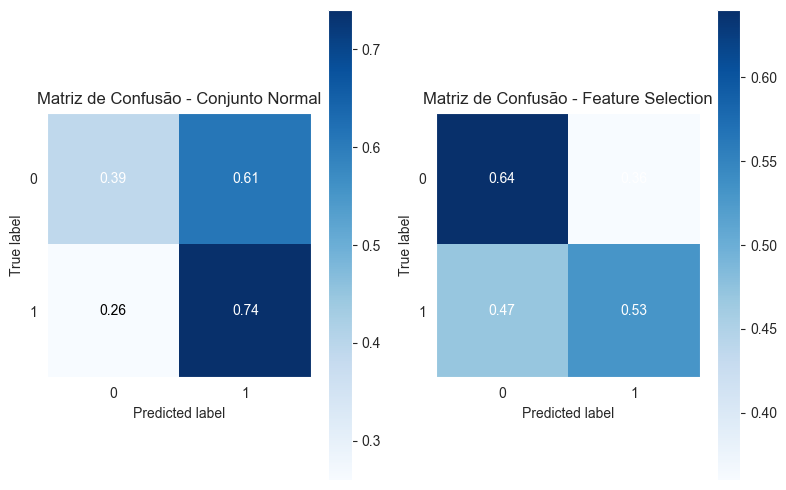

In [451]:
from sklearn.metrics import recall_score

# Instancia o modelo
knn = KNeighborsClassifier()

# Treinando o modelo - Conjunto Normal
knn.fit(X_resampled_stmk, y_resampled_stmk)

# Fazendo a previsão com os dados de teste - Conjunto Normal
y_pred_final = knn.predict(X_test)

# Relatório de Classificação - Conjunto Normal
print(classification_report(y_test, y_pred_final))

recall = recall_score(y_test, y_pred_final)
print('Recall (Conjunto normal): {:.4f}\n'.format(recall))

# Instancia o modelo
knn_pearson = KNeighborsClassifier()

# Treinando o modelo - Feature Selection
knn_pearson.fit(X_resampled_stmk_pearson, y_resampled_stmk_pearson)

# Fazendo a previsão com os dados de teste - Feature Selection
y_pred_final_pearson = knn_pearson.predict(X_test_pearson)

# Relatório de Classificação - Feature Selection
print(classification_report(y_test_pearson, y_pred_final_pearson))

recall_pearson = recall_score(y_test_pearson, y_pred_final_pearson)
print('Recall (Feature Selection): {:.4f}\n'.format(recall_pearson))


fig, ax = plt.subplots(1, 2, figsize=(8, 5))

# Primeira matriz de confusão - Conjunto Normal
skplt.metrics.plot_confusion_matrix(y_test, y_pred_final, normalize=True, ax=ax[0])
ax[0].set_title('Matriz de Confusão - Conjunto Normal')

# Segunda matriz de confusão - Feature Selection
skplt.metrics.plot_confusion_matrix(y_test_pearson, y_pred_final_pearson, normalize=True, ax=ax[1])
ax[1].set_title('Matriz de Confusão - Feature Selection')

# Ajusta a posição dos subplots e espaçamento
plt.tight_layout()

# Exibe o gráfico
plt.show()


Comparando os resultados entre os dois conjuntos, podemos observar que o "**Feature Selection**" apresenta uma **precisão maior para ambas as classes** em comparação ao "Conjunto normal". No entanto, o "Feature Selection" também apresenta um **recall mais baixo para a classe 1**, indicando uma capacidade menor de identificar corretamente as instâncias dessa classe.
Isso sugere que o modelo com "Feature Selection" é capaz de classificar corretamente mais instâncias negativas (classe 0), mas tem dificuldade em identificar corretamente as instâncias positivas (classe 1).

Como, o **desempenho geral** do conjunto de dados utilizando **Feature Selection** e **Smote-Tomek** foi melhor, o utilizarei para avaliar os dados de teste.

## Avaliação do Modelo Utilizando os Dados de Teste

No começo do projeto, realizamos um split nos dados para que tivéssemos 3 conjuntos: Um de treino, um de validação e um de teste. Agora que já exploramos e preparamos os dados, instaciamos o modelo e fizemos previsões no conjunto de validação, é hora de descobrirmos como o modelo reage com os dados de teste.

### Padronização no conjunto de teste

Antes de efetivamente testar os dados nos nossos classificadores, precisamos padronizar os modelos, de forma semelhante à padronização dos dados de treinamento. Para isso, utilizaremos as funções criadas previamente. Logo em seguida, os dados serão separados em X_test e y_test, onde y_test irá conter a variável alvo.

In [455]:
# ver as primeiras entradas
test.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,user_agent,target_fraud,difference_income,latitude,longitude,n2,nim,n15,n3,n1,n11,n10,da,n8,n0,aty,n13,n6,n17,c1,a15,pro+aty,n14,n5,n12,n18,n4,n19,dfa,n9,n16,n7,b19,c55,os_info
24509,5c884f57-ffa8-4e36-e4f1-446c6263eea4,NaN,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,390.00,95.36,0.51,116.62,0.36,NaN,NaN,16499.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,50017.13,True,bNDXnbe7XAx/VUe+cbjDiw==,4UkFK78e10P483RunaoIWA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.00,0.00,8.00,8.00,07:41:10,49,gmail.com,NaN,2,0.00,53.00,deuzelina,743,Invite-web,195-1131837,184011.00,MS,49824,Mozilla/5.0 (Linux; Android 6.0.1; SHIELD Tabl...,NaN,133993.87,-19.78,-40.17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Linux
20644,aecca176-8455-ae1d-6b68-ae459af79e75,False,DGCQep2AE5QRkNCshIAlFQ==,7h+tk4z7O9brtBSe1rNjxA==,340.00,102.04,0.95,109.19,0.31,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,144031.74,False,fR2lwAMjCb/fNXjsApiOTw==,rvdltYNojzCjA1gRsbX9fA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.00,0.00,11.00,NaN,07:09:02,363,outlook.com,0.00,3,1.00,56.00,remerson,590,Waiting-list,232-6264265,53105.00,AM,12886,Mozilla/5.0 (iPhone; CPU iPhone OS 11_0 like M...,NaN,-90926.74,-17.75,-53.29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,iPhone
23092,0ed315cd-c451-171e-1878-8fa77086a97c,False,DGCQep2AE5QRkNCshIAlFQ==,7h+tk4z7O9brtBSe1rNjxA==,360.00,99.65,0.13,102.88,0.22,20039.77,36.00,0.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,128028.94,False,xsd3ZdsI3356I3xMxZeiqQ==,IkavYIMybwGTChPpS3dJ6Q==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,37.00,0.00,0.00,5.00,5.00,21:24:48,248,gmail.com,0.00,2,NaN,34.00,chrystianne,971,Facebook,389-6340718,151969.00,AM,29079,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 6P Bu...,NaN,23940.06,-19.35,-42.93,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Linux
7387,c6f6ff0e-659b-e776-1fc8-425d2fd5a5a4,False,DGCQep2AE5QRkNCshIAlFQ==,osCzpM4hJrxugqWWuZmMWw==,390.00,98.11,0.03,82.68,0.25,7508.72,36.00,14377.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,96016.47,True,GW2VZ3dN3OGHSjQ6JkfqQw==,hKNrx1SIxunqIpoE9PPlow==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,47.00,0.00,0.00,9.00,9.00,09:00:04,113,spgov.com,NaN,0,NaN,8.00,ocimara,355,Radio-commercial,637-6937648,102730.00,SP,43472,Mozilla/5.0 (iPhone; CPU iPhone OS 11_0 like M...,NaN,6713.53,-27.05,-51.14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,iPhone
17240,caf0fd84-38e6-92e6-7034-87dfc38a9f23,False,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,220.00,101.30,0.90,100.63,0.31,NaN,NaN,6825.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,55010.81,False,BB/zpwTH+8GCIVHlhzOU1Q==,VzBKsWnQK586ThbTygkUmA==,NCqL3QBx0pscDnx3ixKwXg==,NaN,nSpvDsIsslUaX6GE6m6eQA==,17.00,0.00,0.00,8.00,8.00,13:43:06,410,hotmail.com,0.00,3,0.00,59.00,estela,622,Twitter,402-9630815,191296.00,RO,54047,"Mozilla/5.0 (iPhone9,3; U; CPU iPhone OS 10_0_...",NaN,136285.19,-8.96,-45.65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,iPhone


In [456]:
# realiza a limpeza de dados
test_clean = clean_data(test)
# verificar as inco primeiras entradas
test_clean.head()

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,channel,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,email,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,marketing_channel,reported_income,shipping_state,difference_income,latitude,longitude,n2,nim,n15,n3,n1,n11,n10,da,n8,n0,aty,n13,n6,n17,c1,a15,pro+aty,n14,n5,n12,n18,n4,n19,dfa,n9,n16,n7,b19,c55,os_info
20644,False,DGCQep2AE5QRkNCshIAlFQ==,7h+tk4z7O9brtBSe1rNjxA==,340.00,102.04,0.95,109.19,0.31,12032.04,36.00,25925.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,144031.74,False,NCqL3QBx0pscDnx3ixKwXg==,32.00,0.00,0.00,11.00,10.00,363,outlook.com,3,1.00,56.00,590,Waiting-list,53105.00,AM,-90926.74,-17.75,-53.29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,iPhone
23092,False,DGCQep2AE5QRkNCshIAlFQ==,7h+tk4z7O9brtBSe1rNjxA==,360.00,99.65,0.13,102.88,0.22,20039.77,36.00,0.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,128028.94,False,NCqL3QBx0pscDnx3ixKwXg==,37.00,0.00,0.00,5.00,5.00,248,gmail.com,2,0.50,34.00,971,Facebook,151969.00,AM,23940.06,-19.35,-42.93,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Linux
7387,False,DGCQep2AE5QRkNCshIAlFQ==,osCzpM4hJrxugqWWuZmMWw==,390.00,98.11,0.03,82.68,0.25,7508.72,36.00,14377.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,96016.47,True,NCqL3QBx0pscDnx3ixKwXg==,47.00,0.00,0.00,9.00,9.00,113,spgov.com,0,0.50,8.00,355,Radio-commercial,102730.00,SP,6713.53,-27.05,-51.14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,iPhone
17240,False,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,220.00,101.30,0.90,100.63,0.31,12032.04,36.00,6825.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,55010.81,False,NCqL3QBx0pscDnx3ixKwXg==,17.00,0.00,0.00,8.00,8.00,410,hotmail.com,3,0.00,59.00,622,Twitter,191296.00,RO,136285.19,-8.96,-45.65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,iPhone
13382,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,260.00,103.79,0.11,118.86,0.40,6027.56,36.00,25925.00,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,89864.11,False,NCqL3QBx0pscDnx3ixKwXg==,10.00,0.00,0.00,11.00,10.00,112,spgov.com,3,0.00,53.00,617,Waiting-list,149488.00,GO,59623.89,-21.13,-43.99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,iPhone


In [457]:
# realiza o pré processamento dos dados
test_encoded = preprocess_data(test_clean)
# verificar as cinco primeiras entradas 
test_encoded.head()

,target_default,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,facebook_profile,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,difference_income,latitude,longitude,n2,nim,n15,n3,n1,n11,n10,da,n8,n0,aty,n13,n6,n17,c1,a15,pro+aty,n14,n5,n12,n18,n4,n19,dfa,n9,n16,n7,b19,c55,reason_col_0,reason_col_1,reason_col_2,reason_col_3,reason_col_4,reason_col_5,reason_col_6,reason_col_7,channel_col_0,channel_col_1,channel_col_2,channel_col_3,channel_col_4,channel_col_5,channel_col_6,channel_col_7,email_col_0,email_col_1,email_col_2,email_col_3,email_col_4,email_col_5,email_col_6,email_col_7,marketing_channel_col_0,marketing_channel_col_1,marketing_channel_col_2,marketing_channel_col_3,marketing_channel_col_4,marketing_channel_col_5,marketing_channel_col_6,marketing_channel_col_7,shipping_state_col_0,shipping_state_col_1,shipping_state_col_2,shipping_state_col_3,shipping_state_col_4,shipping_state_col_5,shipping_state_col_6,shipping_state_col_7,os_info_col_0,os_info_col_1,os_info_col_2,os_info_col_3,os_info_col_4,os_info_col_5,os_info_col_6,os_info_col_7,score_1_encoded,score_2_encoded
20644,0,-0.06,0.63,1.54,0.89,0.15,-0.11,-0.27,-0.17,1.75,0,-0.11,-0.28,-0.07,0.11,-0.17,0.77,1.31,1.22,1.55,0.30,-0.04,-0.04,-0.36,-0.86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,3,6
23092,0,0.12,-0.11,-1.30,0.28,-0.73,1.63,-0.27,-1.05,1.37,0,0.26,-0.28,-0.07,-1.22,-1.45,-0.03,0.42,-0.01,0.32,1.62,-0.04,-0.04,-0.55,0.53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,3,6
7387,0,0.40,-0.59,-1.65,-1.70,-0.44,-1.09,-0.27,-0.56,0.61,1,0.98,-0.28,-0.07,-0.34,-0.43,-0.96,-1.38,-0.01,-1.13,-0.51,-0.04,-0.04,-1.47,-0.57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,3,26
17240,0,-1.15,0.40,1.37,0.06,0.15,-0.11,-0.27,-0.82,-0.37,0,-1.19,-0.28,-0.07,-0.56,-0.68,1.10,1.31,-1.23,1.72,0.41,-0.04,-0.04,0.70,0.16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,3,9
13382,0,-0.79,1.17,-1.37,1.84,1.04,-1.41,-0.27,-0.17,0.46,0,-1.70,-0.28,-0.07,0.11,-0.17,-0.97,1.31,-1.23,1.38,0.40,-0.04,-0.04,-0.76,0.39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,10


In [458]:
# separar variáveis entre X e y
X_test = test_encoded.drop('target_default', axis=1)
y_test = test_encoded['target_default']

### Balanceamento de dados

Verificaremos o balanceamento do conjunto de teste após o pré-processamento e limpeza.

In [459]:
# tamanho dos dados de teste
test_encoded.shape

(4799, 104)

In [460]:
# balanceamento dos dados de teste
test_encoded.target_default.value_counts()

0    4077
1     722
Name: target_default, dtype: int64

O conjunto de teste contém 4799 instâncias, sendo 722 referente à classe 1 (indadimplente) e 4077 à classe 0 (não inadimplente). Pode-se perceber que o **conjunto é desbalanceado**, haja vista que é uma amostra dos dados originais. 

Abaixo realizaremos previsões no conjunto de teste utilizando o `KNeighborsClassifier`, e as colunas selecionadas por feature selection.

              precision    recall  f1-score   support

           0       0.97      0.72      0.83      4077
           1       0.36      0.89      0.51       722

    accuracy                           0.74      4799
   macro avg       0.67      0.81      0.67      4799
weighted avg       0.88      0.74      0.78      4799

Recall (Feature Selection): 0.8947



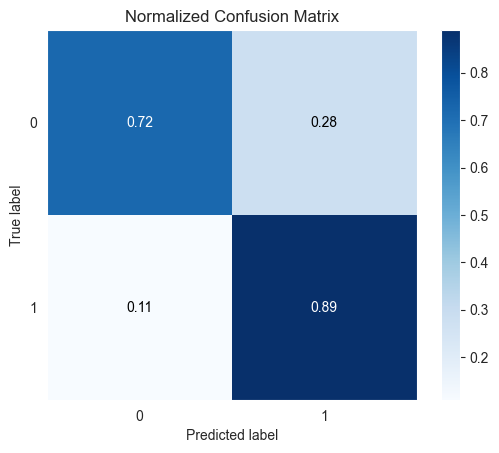

In [463]:
# Instancia o modelo
knn = KNeighborsClassifier()

# Treinando o modelo - Conjunto Normal
knn.fit(X_resampled_stmk_pearson, y_resampled_stmk_pearson)

# Obter as colunas do X_resampled_stmk_pearson
selected_columns = X_resampled_stmk_pearson.columns

# Selecionar apenas as colunas correspondentes em X_test
X_test_selected = X_test[selected_columns]

# Fazendo a previsão com os dados de teste
y_pred_final = knn.predict(X_test_selected)

# Relatório de Classificação
print(classification_report(y_test, y_pred_final))

recall = recall_score(y_test, y_pred_final)
print('Recall (Feature Selection): {:.4f}\n'.format(recall))

# plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_final, normalize=True);


Os resultados do relatório de classificação para o conjunto de teste usando o modelo treinado com **Feature Selection** e **SMOTE-TOMEK** são os seguintes:

* Precision para a classe 0 é de 0,97, o que indica que cerca de 97% das instâncias classificadas como 0 são realmente da classe 0.
* Precision para a classe 1 é de 0,36, o que significa que cerca de 36% das instâncias classificadas como 1 são realmente da classe 1.
* Recall para a classe 0 é de 0,72, indicando que 72% das instâncias da classe 0 foram corretamente identificadas.
* Recall para a classe 1 é de 0,89, o que significa que 89% das instâncias da classe 1 foram corretamente identificadas.
* A acurácia do modelo é de 74%, ou seja, cerca de 74% das instâncias foram classificadas corretamente.

Comparando os resultados com os conjuntos anteriores, observamos uma **melhoria significativa** no recall para a classe 1 com o uso da técnica de Feature Selection e o balanceamento com SMOTE-TOMEK. Isso indica que o modelo está melhorando sua capacidade de identificar corretamente os casos de risco, reduzindo a quantidade de falsos negativos. No entanto, a precisão para a classe 1 ainda é baixa, o que pode resultar em um número considerável de falsos positivos.

No contexto de análise de risco, o **recall** é a métrica mais relevante a ser analisada, pois afeta diretamente a capacidade do modelo em **identificar corretamente os casos de risco**. Garantir um alto recall é essencial para minimizar a ocorrência de casos não identificados que possam representar riscos financeiros para a empresa. No entanto, é importante ressaltar que ainda há espaço para melhorias no projeto, buscando um equilíbrio entre recall e precisão, para reduzir tanto os falsos negativos quanto os falsos positivos.

## Conclusão

Neste projeto, exploramos o **desafio da inadimplência** enfrentado pelas empresas e desenvolvemos um modelo de **Machine Learning** para prever a probabilidade de inadimplência dos clientes. Ao longo do processo, realizamos uma **análise detalhada dos dados**, aplicamos técnicas de **pré-processamento e balanceamento de classes**, e **treinamos diferentes modelos** utilizando diferentes conjuntos de características.

Durante o desenvolvimento do projeto, exploramos diversas etapas de **feature engineering**, que consiste no processamento e transformação das características originais do conjunto de dados. Essas etapas incluíram a seleção das características mais relevantes. O feature engineering desempenhou um papel crucial na melhoria do desempenho dos modelos, permitindo uma melhor representação dos dados e um aprendizado mais eficaz.

Os resultados obtidos revelaram algumas descobertas interessantes. Primeiramente, observamos que a utilização de **técnicas de balanceamento de classes**, como o RandomUnderSampling, SMOTE e o SMOTE-TOMEK, foi **fundamental para melhorar o desempenho dos modelos**. Essas técnicas ajudaram a lidar com o desbalanceamento entre as classes, permitindo que o modelo identificasse com mais precisão os casos de inadimplência.

Além disso, a seleção de características (**feature selection**) mostrou-se uma etapa importante para melhorar o desempenho dos modelos. Ao reduzir o número de características, focando nas mais relevantes, conseguimos obter **modelos mais simples e eficientes**, sem comprometer significativamente a qualidade das previsões.

No entanto, é importante ressaltar que os resultados obtidos ainda apresentam espaço para melhorias. A precisão na identificação dos casos de inadimplência ainda pode ser aprimorada, especialmente em relação à classe minoritária. Além disso, a interpretação dos resultados e a análise do impacto financeiro das previsões de inadimplência também são aspectos importantes a serem considerados.

Em suma, este projeto evidenciou a complexidade e os desafios associados à tarefa de prever a inadimplência. Embora tenhamos obtido avanços significativos por meio do pré-processamento dos dados, balanceamento de classes e seleção de características, reconhecemos que ainda há espaço para aprimoramentos e abordagens adicionais. Futuras pesquisas e experimentações podem contribuir para um modelo mais preciso e confiável na previsão de casos de inadimplência, fornecendo às empresas uma ferramenta valiosa para a gestão de riscos e tomada de decisões estratégicas.